# Team Members


1.   **Ambadas B. Maske (213350018)**
2.   **Sashwat Ghai (21335T005)**



# Assignment Instructions


Instructions:
a) Only submit ipython notebooks. The notebook should be a complete code plus report with copious
comments, references and URLs, outputs, critical observations, and your reasoning to choose next steps.
b) Use good coding practices such as avoiding hard-coding, using self-explanatory variable names, using
functions (if applicable). This will also be graded.
c) You may use libraries such as scikit-learn, and need not code anything from scratch.
d) Cite your sources if you use code from the internet. Also clarify what you have modified. Ensure that the
code has a permissive license or it can be assumed that academic purposes fall under ‘fair use’.

Objective: Learn various steps and due diligence needed to train successful classification models.

# Exploratory Data Analysis

### Importing Libraries and Dataset

In [314]:
from pandas.core.frame import DataFrame
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 


## Importing Dataset and Checking the Info

In [2]:
training_data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
training_data.shape
# Data contains 762 observations (Rows) and 79 features (Columns) having Protein Data tested on Mouses 

(762, 79)

In [3]:
training_data.info()
# All features except Genotype and Treatment behavior are float64
# 9 features out of 79 are having null values. Features havig null values are ELK_N,MEK_NBcatenin_N,BAD_N ,BCL2_N ,pCFOS_N,H3AcK18_N,EGR1_N,H3MeK4_N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

### Class Label Encoding

In [4]:
# Encode columns having string or object as dtypes to get numerical dataset for further analysis
#https://www.mygreatlearning.com/blog/label-encoding-in-python/
def encode_val(data_matrix):
  encode = LabelEncoder() 
  for column in data_matrix:
    if (data_matrix.dtypes[column]== object):
      data_matrix[column] = encode.fit_transform(data_matrix[column])

In [5]:
encode_val(training_data) 
 # Initially Train Dataset have last two columns / Target values as categorical we encoded the values to 0,1,2, and 3

### Checking Missing values and Dropping Columns

In [6]:
def check_missing_drop(data_matrix):
  # Check for missing values in datasets
  null_col = data_matrix.isnull().sum() 
  # set threshold of 20%
  drop_cols = null_col[null_col > len(data_matrix)*0.20]
  # dropping columns having highy missing values more than 20%
  data_matrix_new = data_matrix.drop(list(drop_cols.index), axis=1)
  drop_cols = list(drop_cols.index)  
  return data_matrix_new, drop_cols

In [7]:
training_data_new, dropped_miss_cols = check_missing_drop(training_data)
training_data.shape, training_data_new.shape
# New shape changed to 75 from initial 79 features

((762, 79), (762, 75))

### Imputing Missing Data

In [8]:
def impute_missing(data_matrix_new):
  from sklearn.experimental import enable_iterative_imputer
  from sklearn.impute import IterativeImputer
  #imputing the missing variables from # https://scikit-learn.org/stable/modules/impute.html
  imp = IterativeImputer(max_iter=10, random_state=0)
  imp.fit(data_matrix_new)
  data_matrix_imp = imp.transform(data_matrix_new)
  data_matrix_imputed = pd.DataFrame(data_matrix_imp, columns = data_matrix_new.columns) #converting it into a Data Frame
  return data_matrix_imputed

In [9]:
training_data_imputed = impute_missing(training_data_new)

In [10]:
# checked for unique values in newly imputed dataset
not_unique = training_data_imputed.nunique(axis=0)
not_unique[not_unique != len(training_data_imputed)]
# There are not too many repititive values in datasets hence we dont need to care about that, and no need to ommit those

ITSN1_N               761
pBRAF_N               760
pJNK_N                761
CREB_N                758
RSK_N                 761
P38_N                 761
TIAM1_N               760
pP70S6_N              761
SNCA_N                761
Genotype                2
Treatment_Behavior      4
dtype: int64

### Checking Distribution of Data and Removing Outliers (Capping)

In [11]:
# for checking  the distribution and outliers in data i.e. imputed data before outlier removal 
# referred from https://stackoverflow.com/questions/12127635/matplotlib-can-we-draw-a-histogram-and-a-box-plot-on-a-same-chart
def check_distribution(data_matrix):
  plt.rcParams.update({'figure.max_open_warning': 0})
  for col in data_matrix.columns.values:
      fig, ax = plt.subplots(1, 2, figsize=(13,5))
      sns.histplot(data=data_matrix, x=col, ax=ax[0])
      sns.boxplot(data=data_matrix, x=col, ax=ax[1])

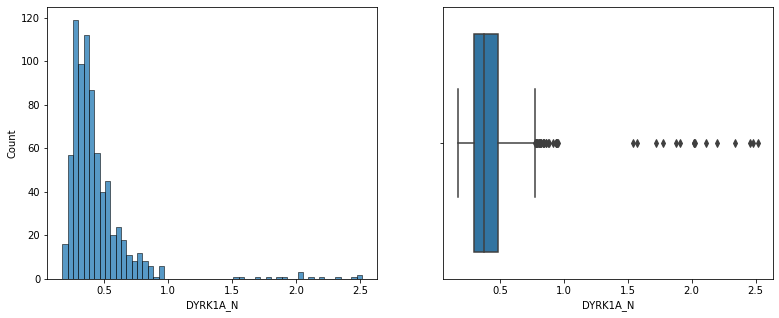

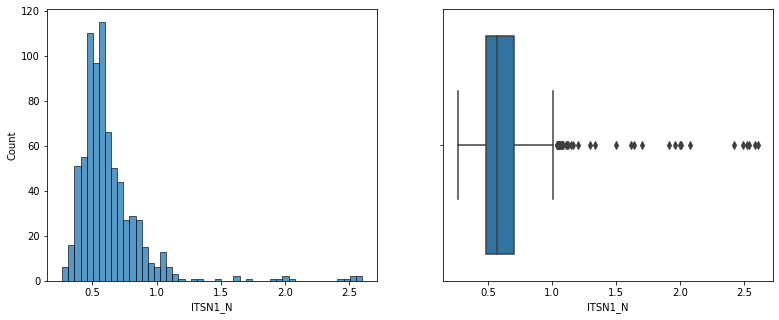

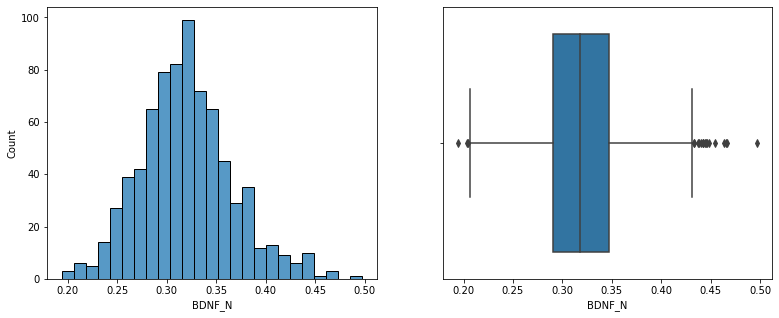

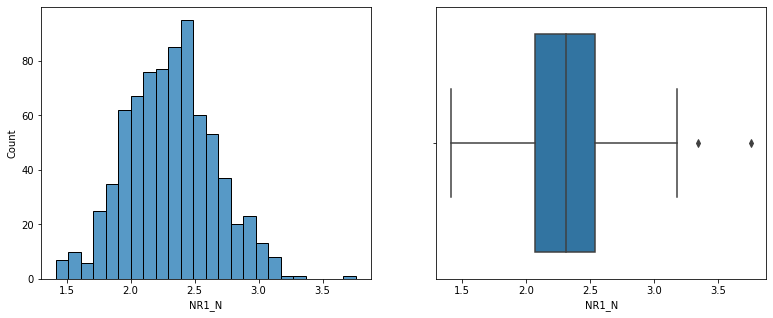

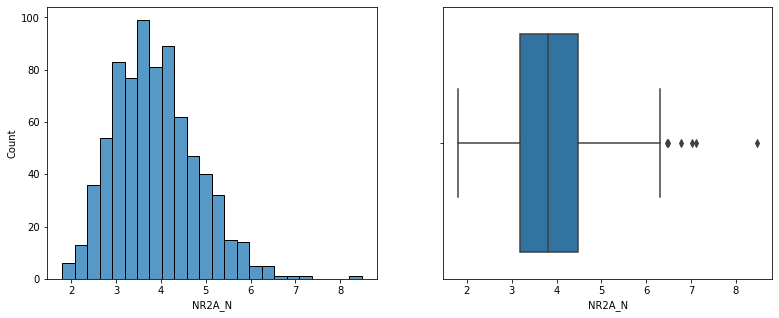

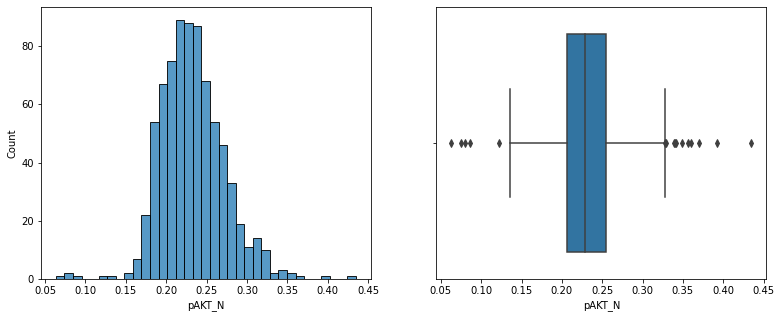

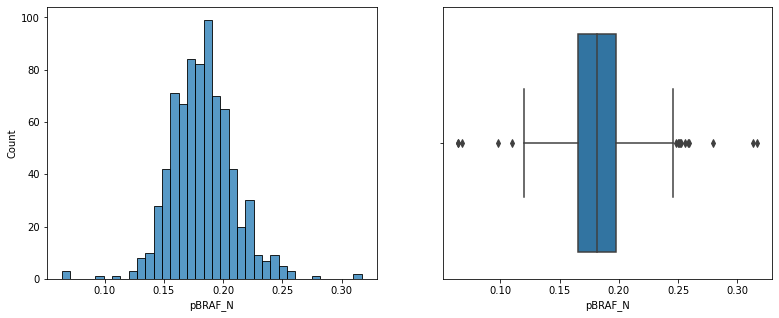

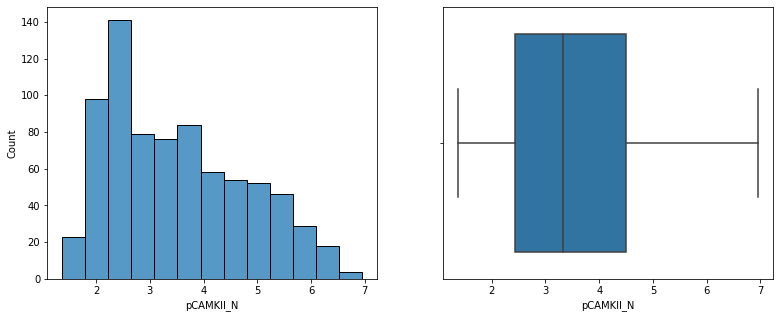

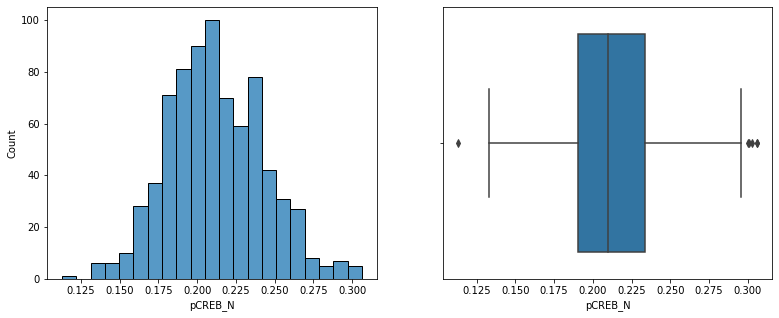

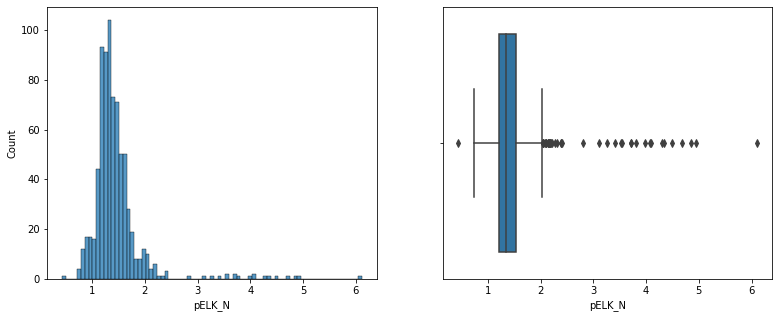

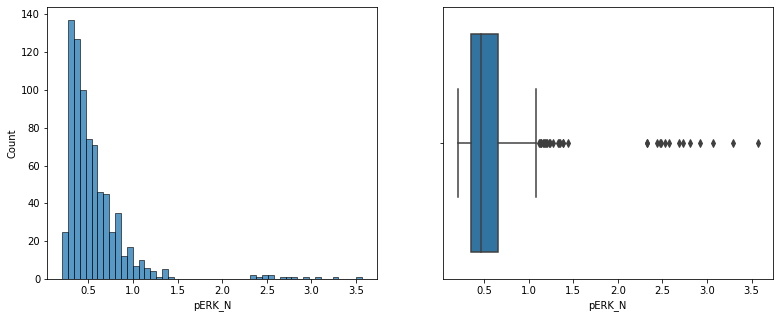

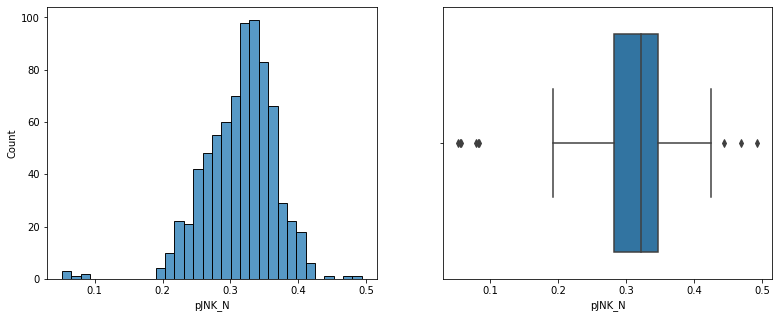

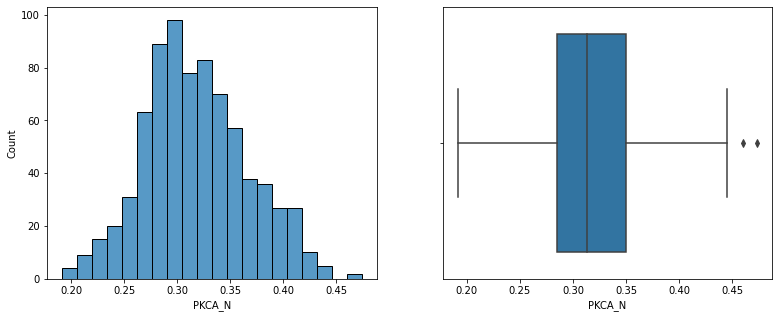

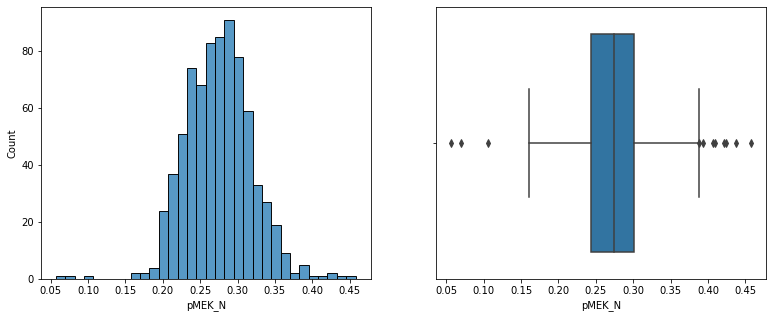

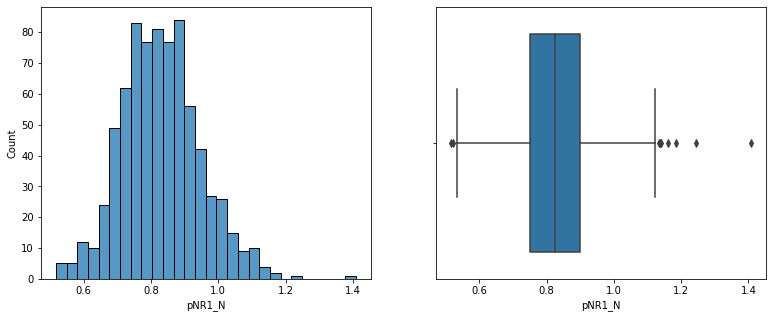

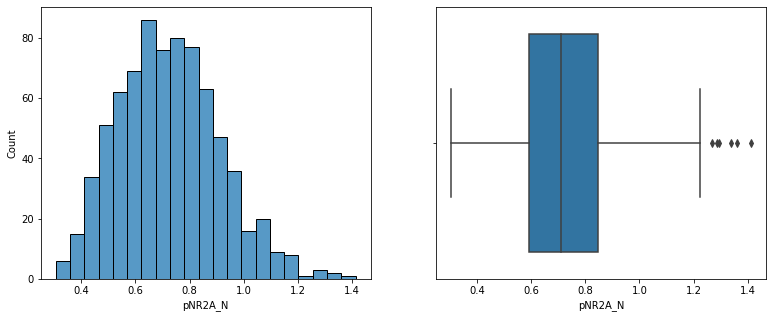

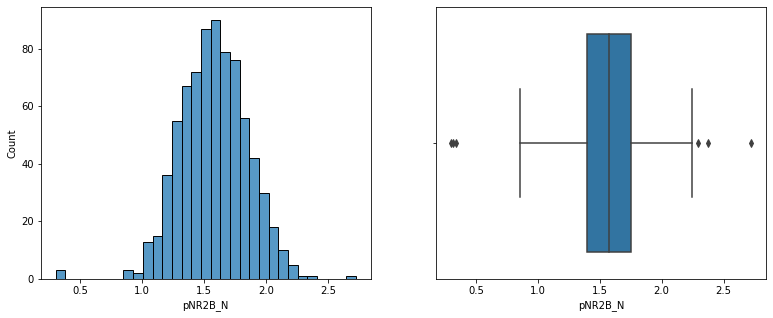

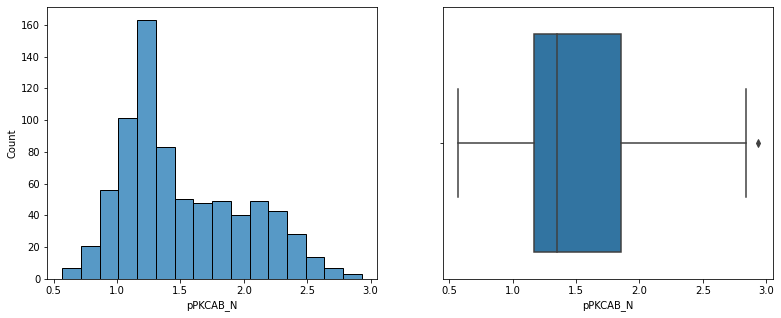

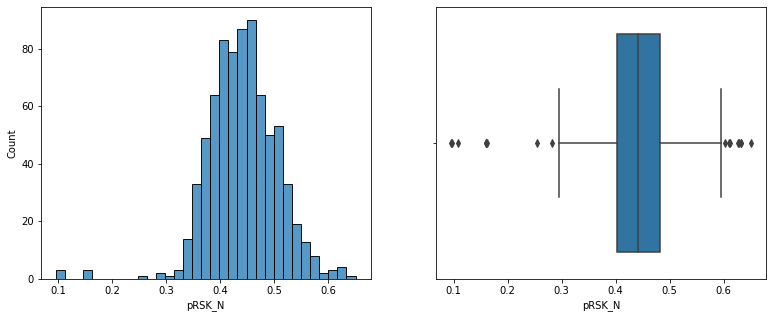

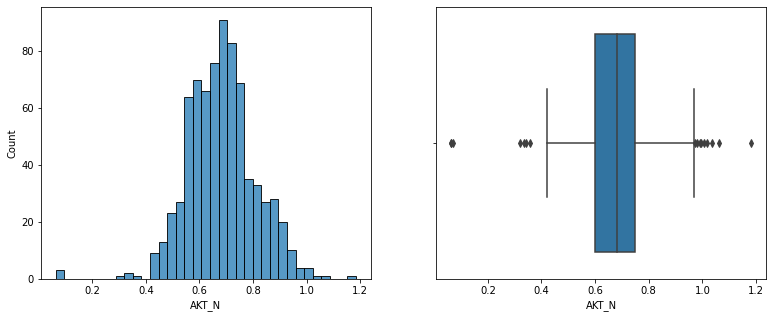

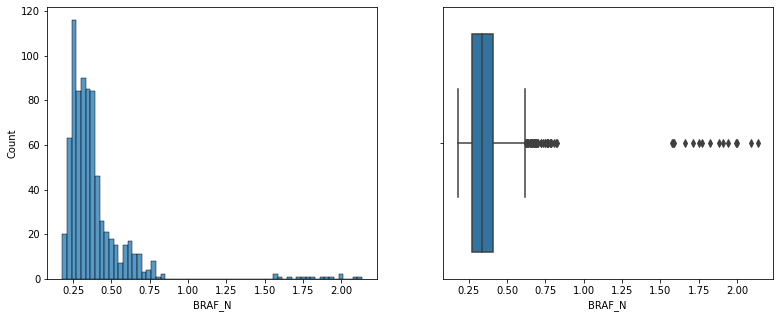

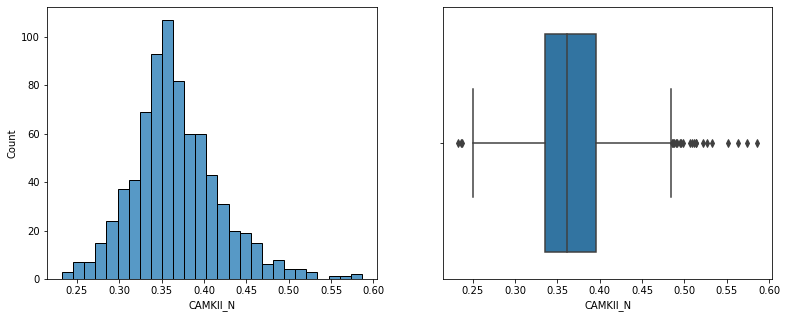

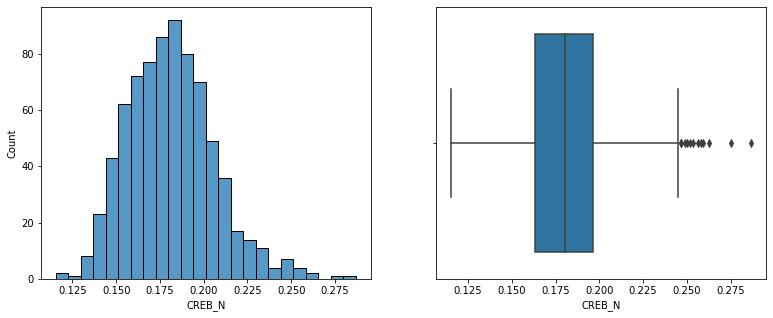

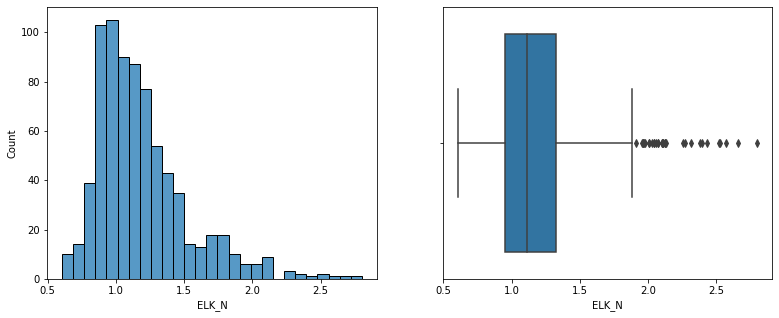

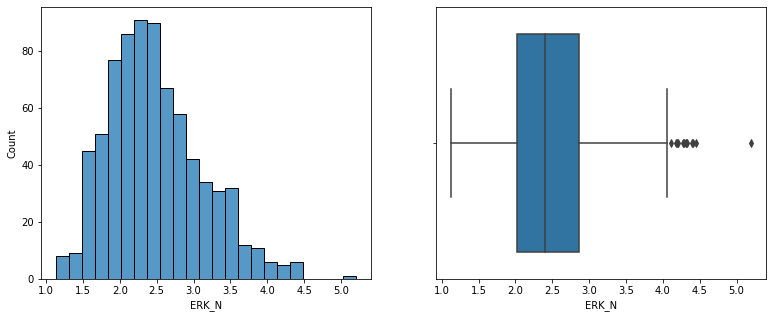

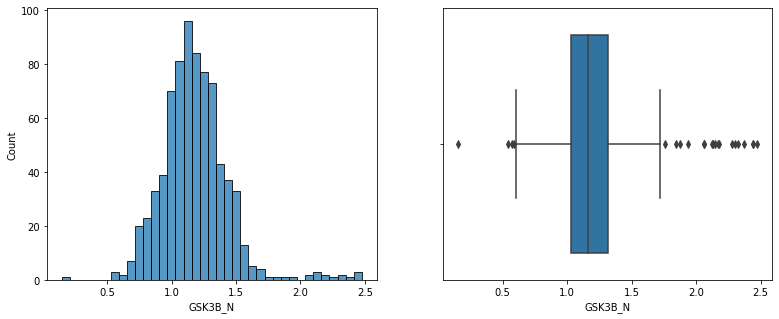

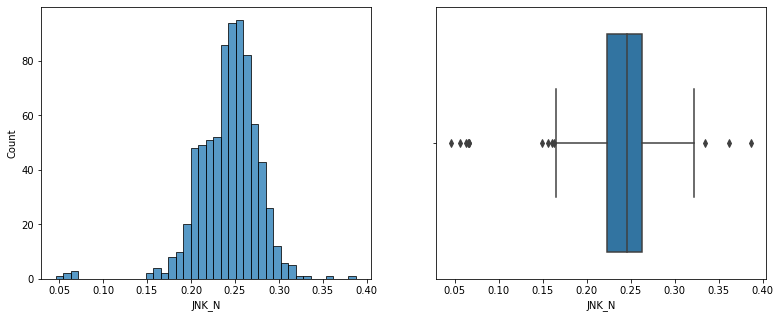

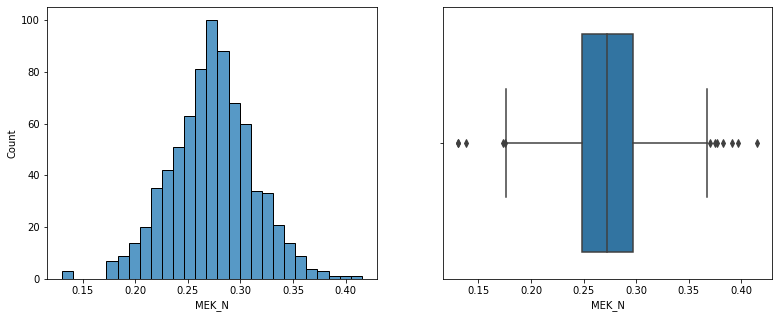

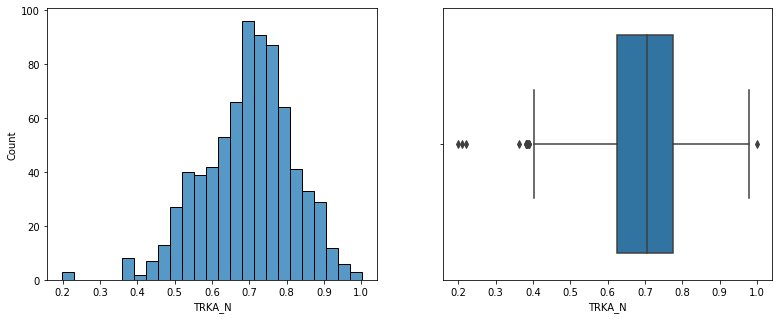

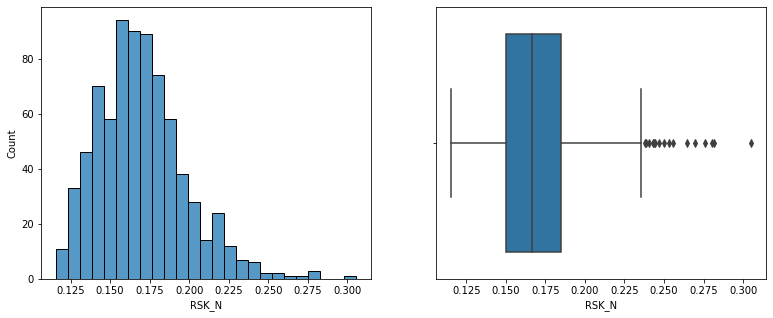

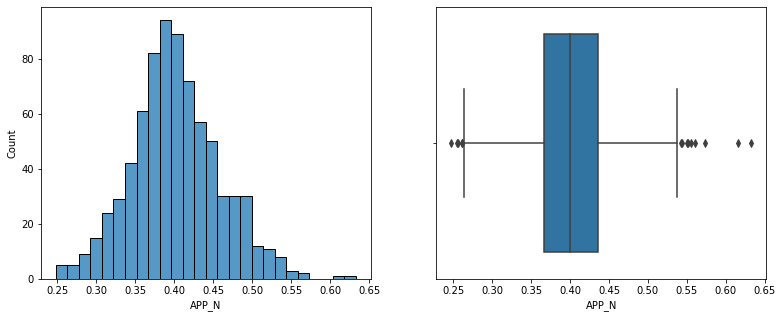

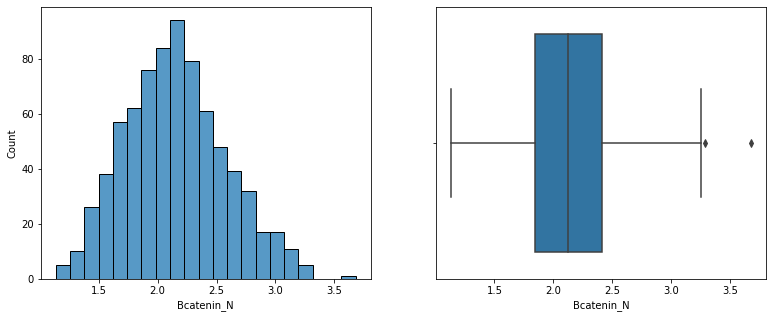

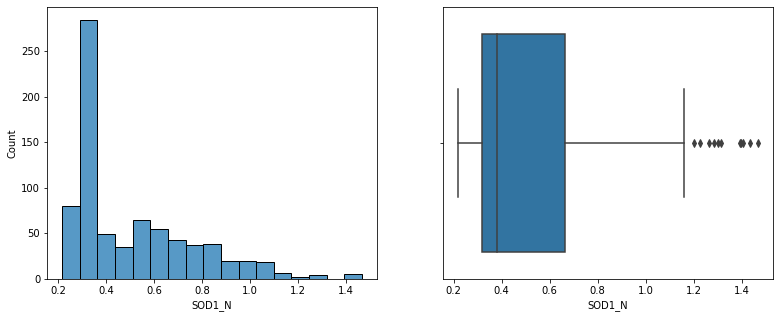

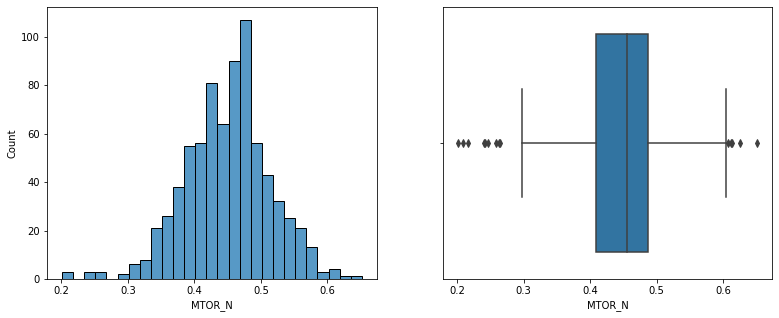

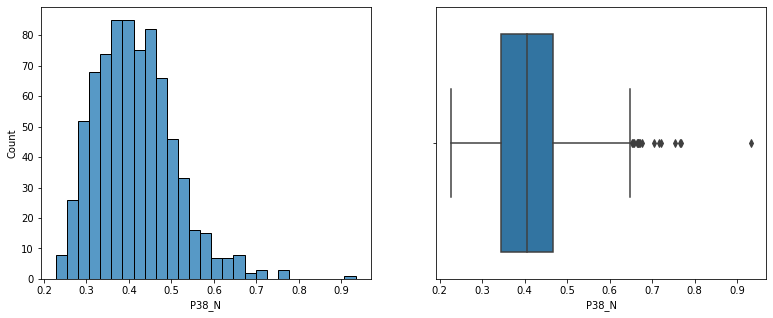

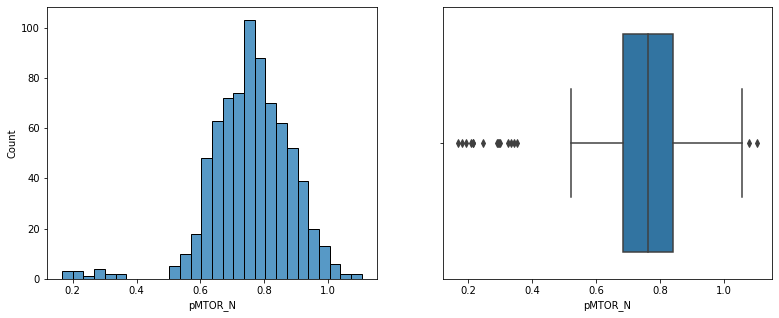

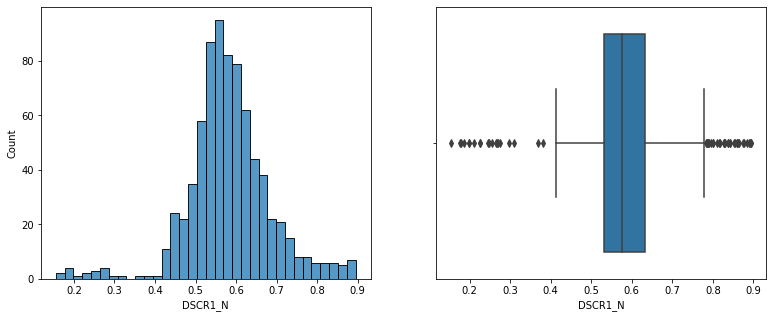

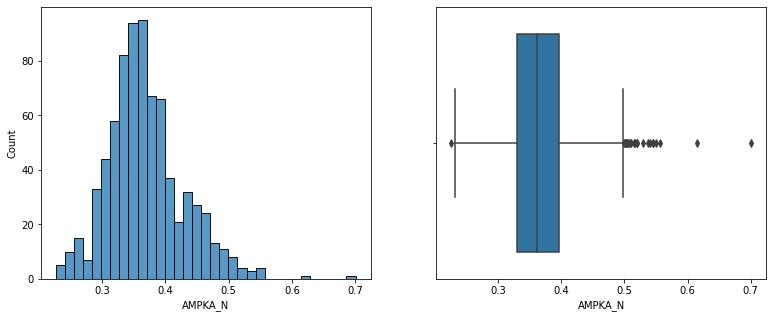

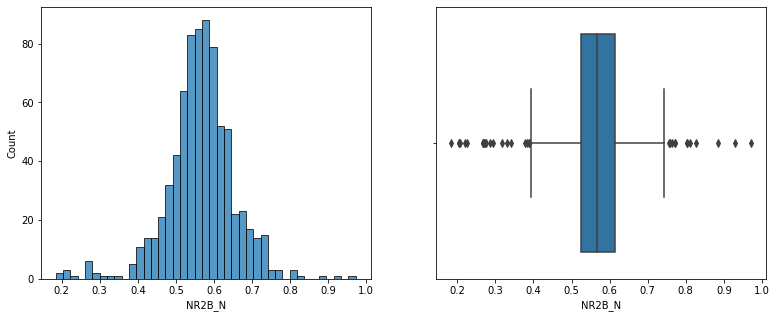

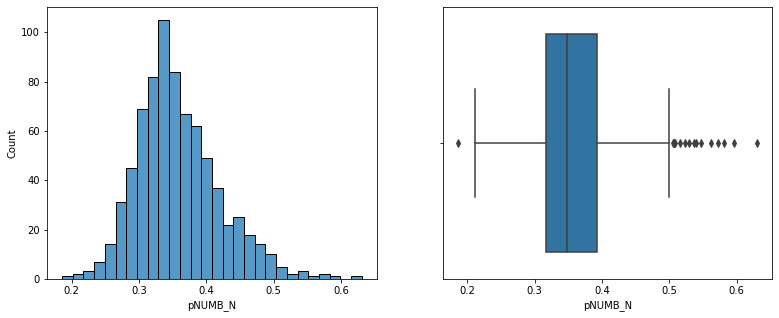

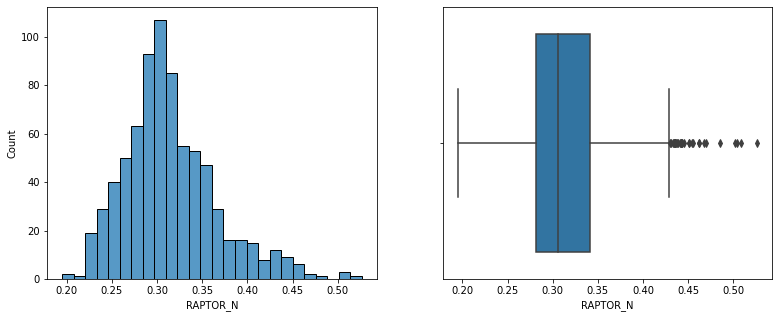

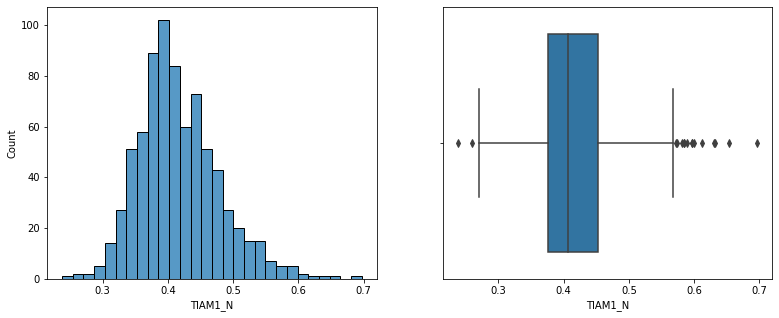

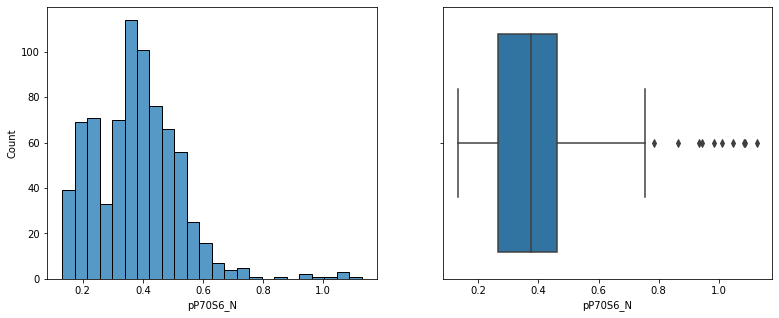

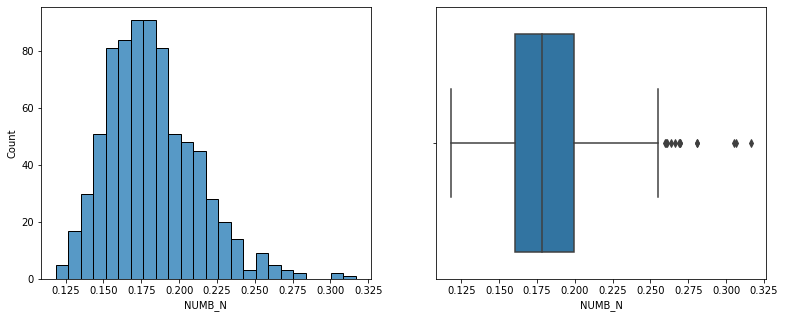

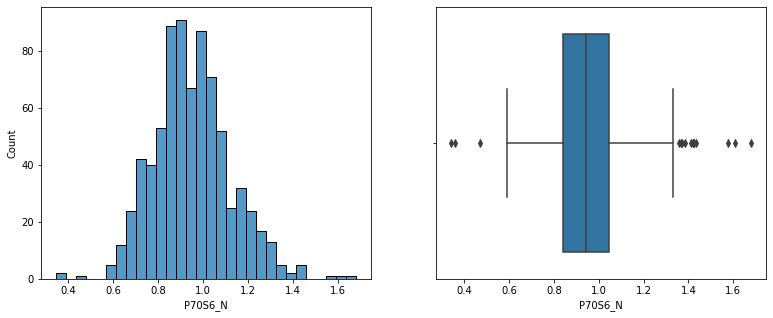

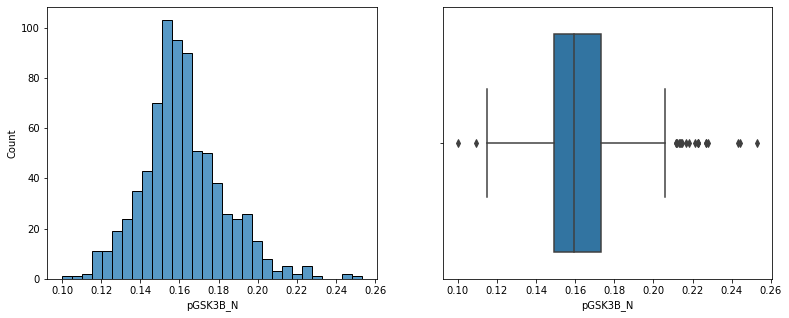

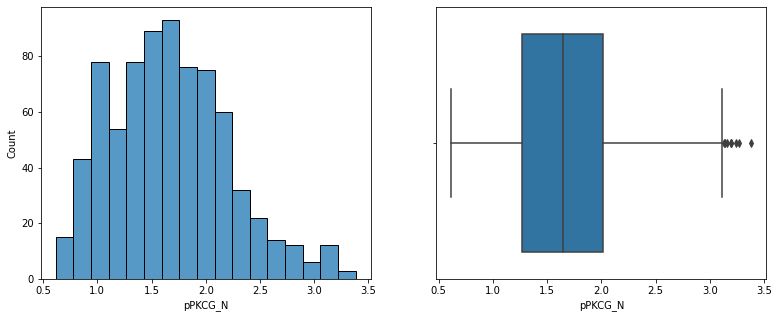

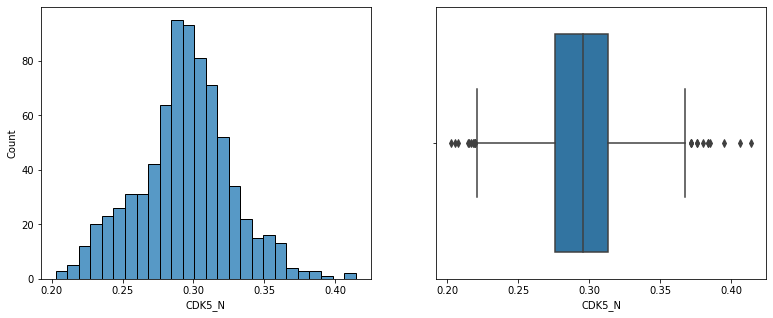

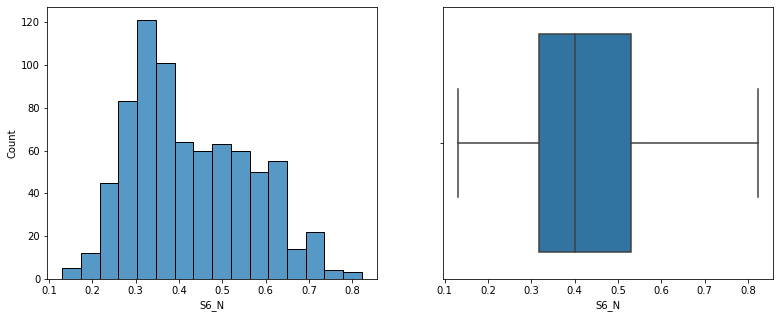

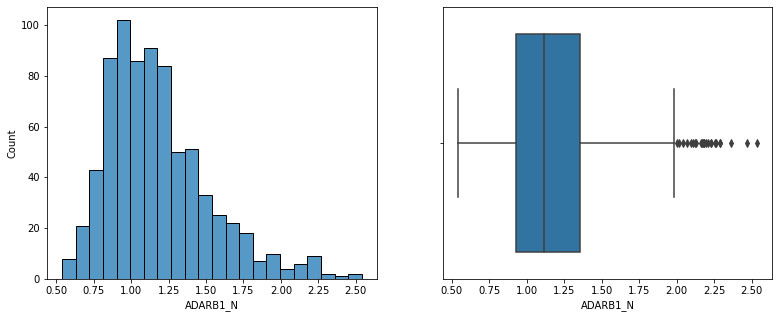

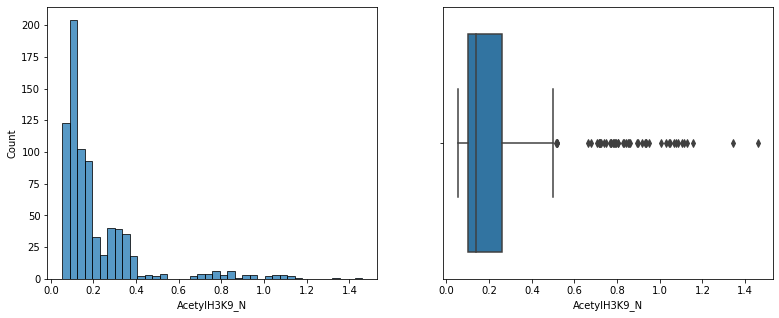

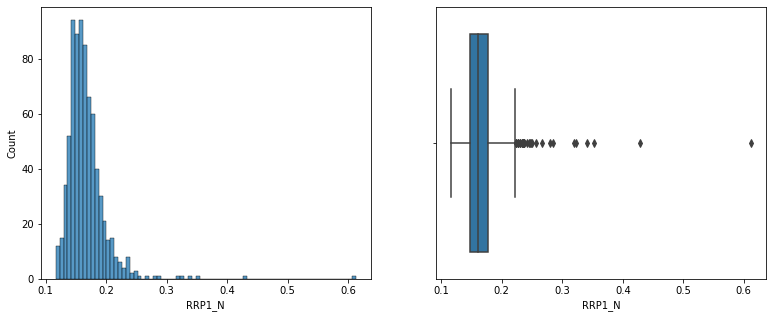

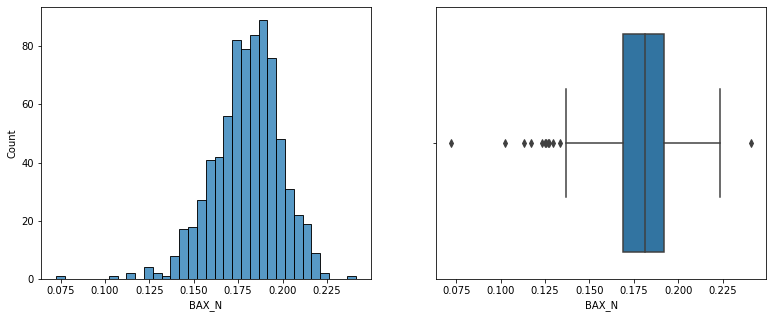

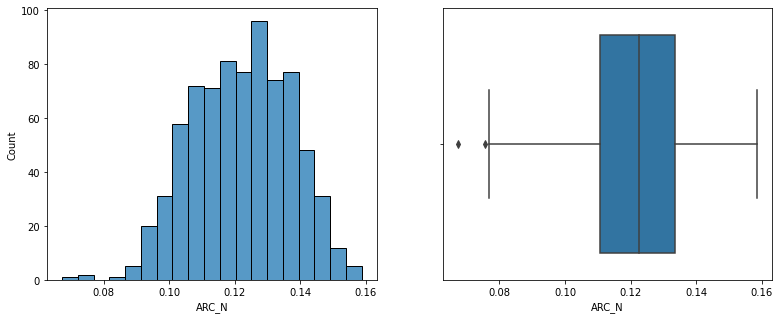

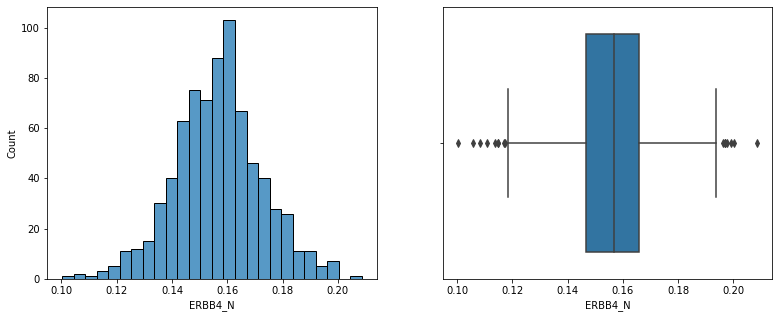

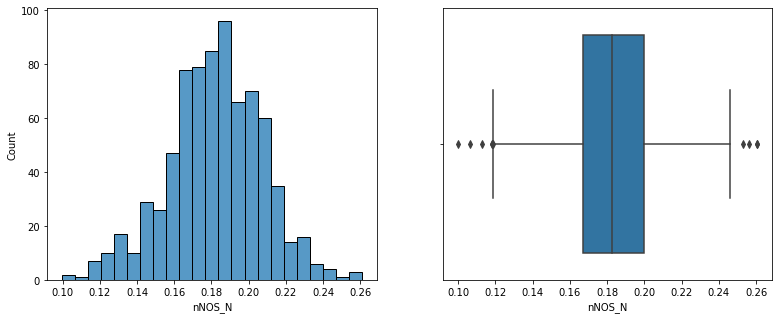

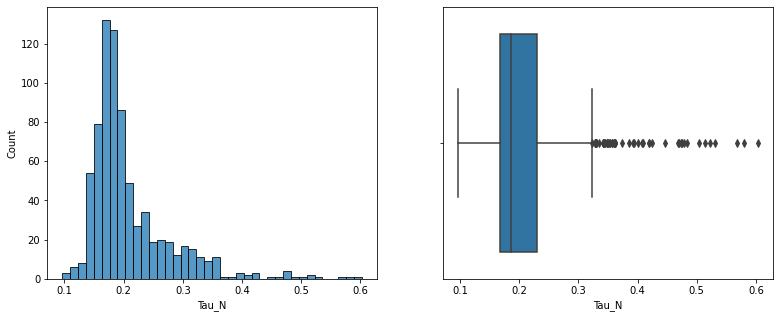

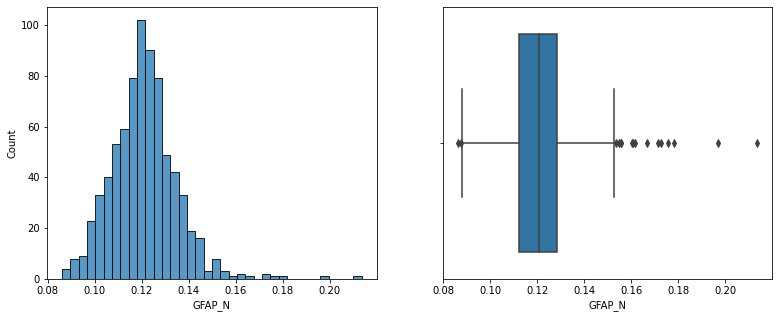

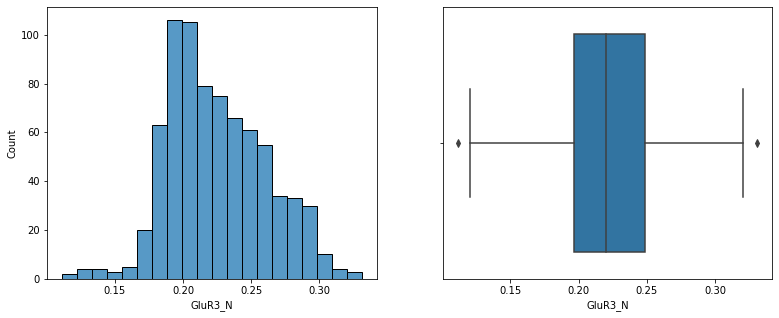

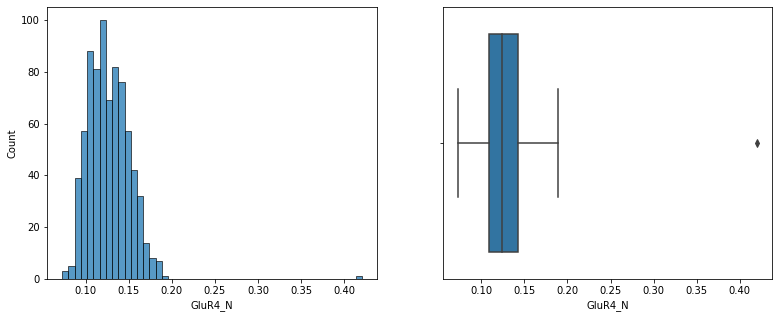

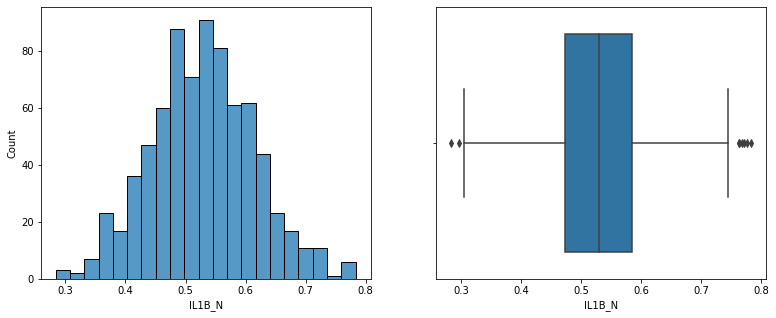

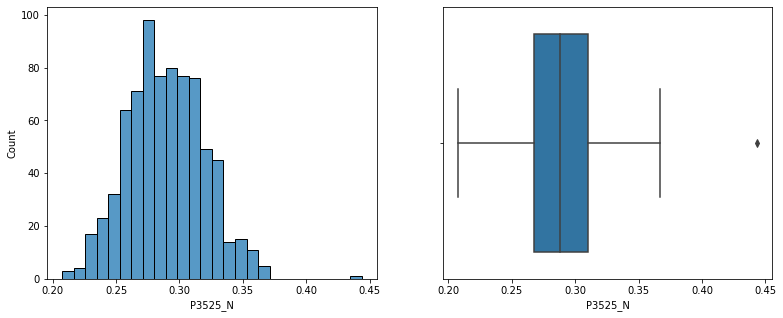

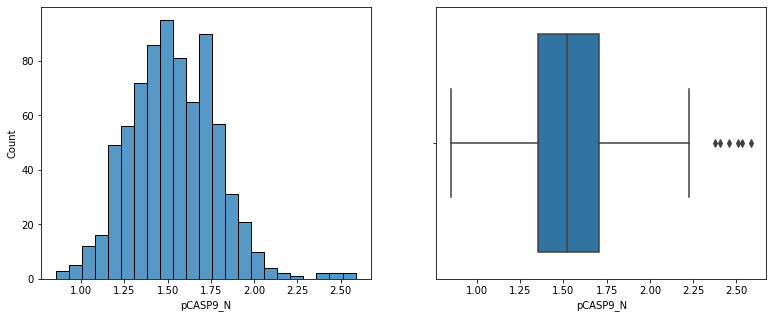

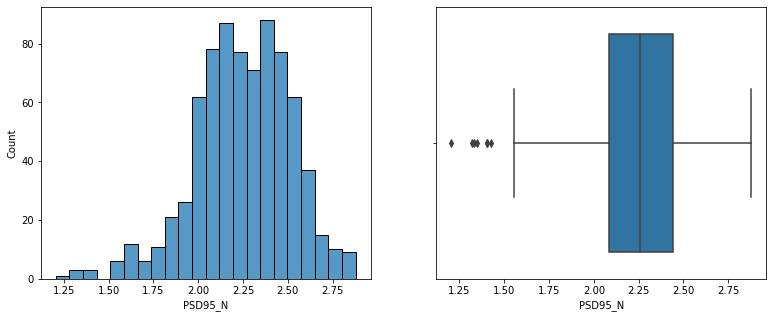

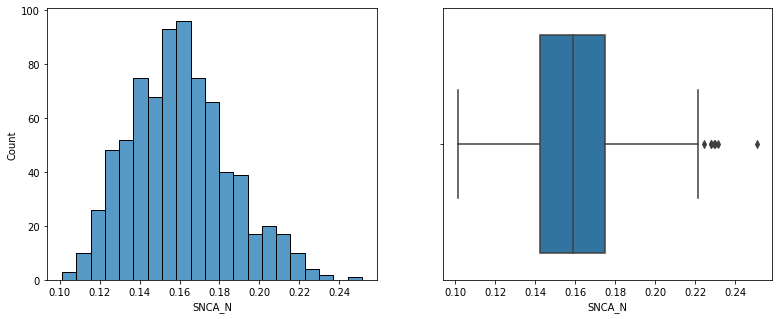

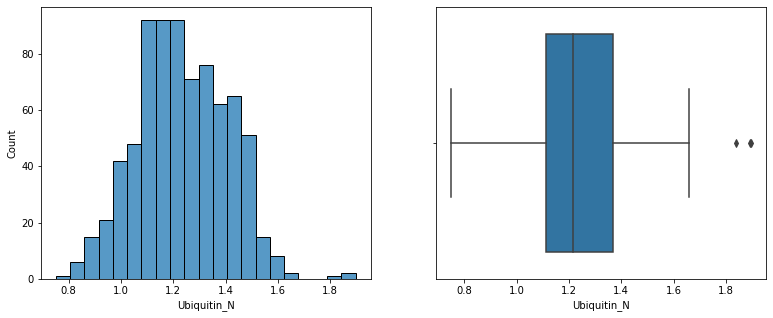

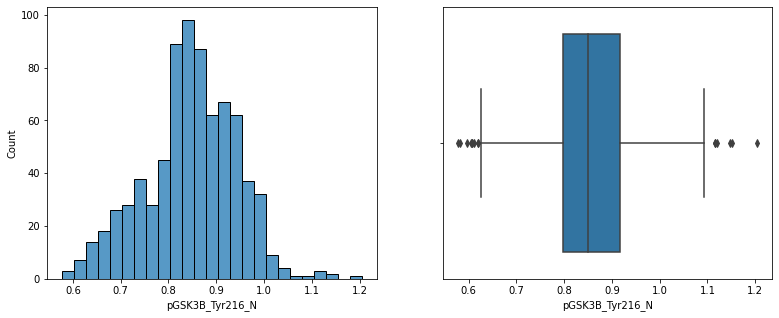

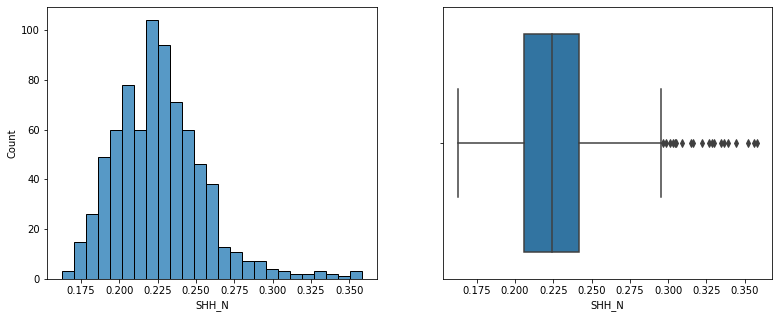

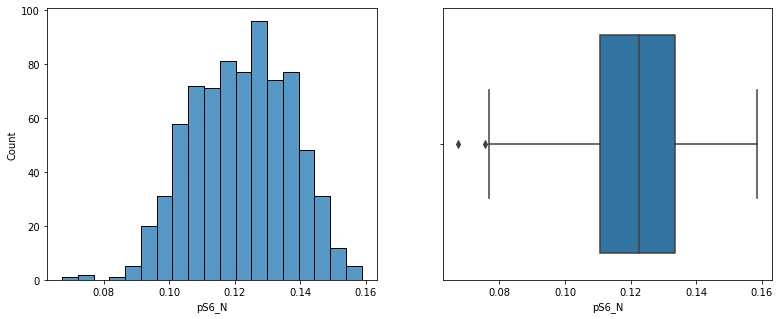

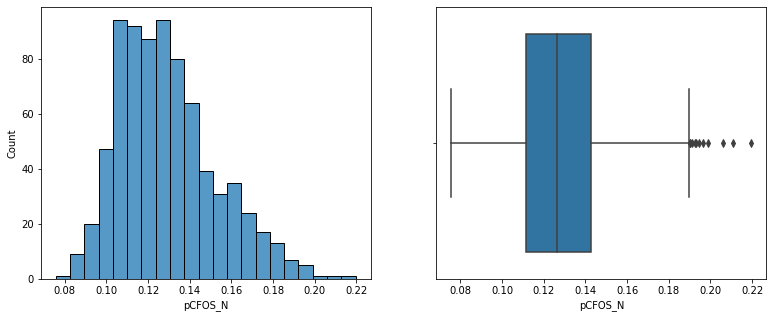

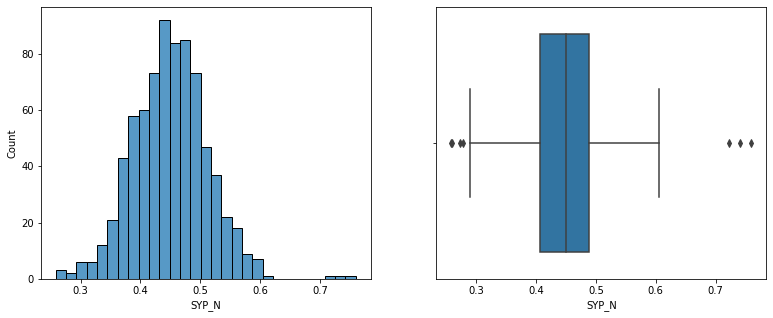

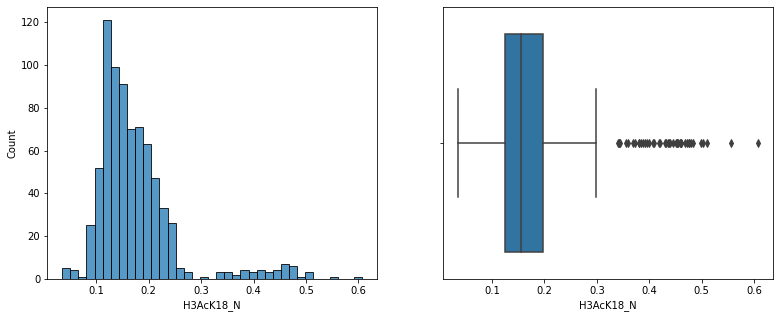

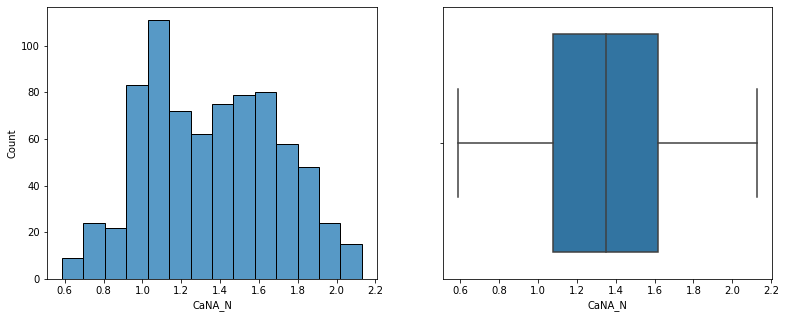

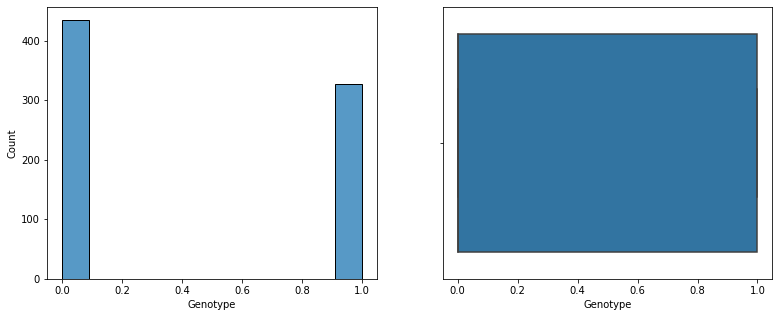

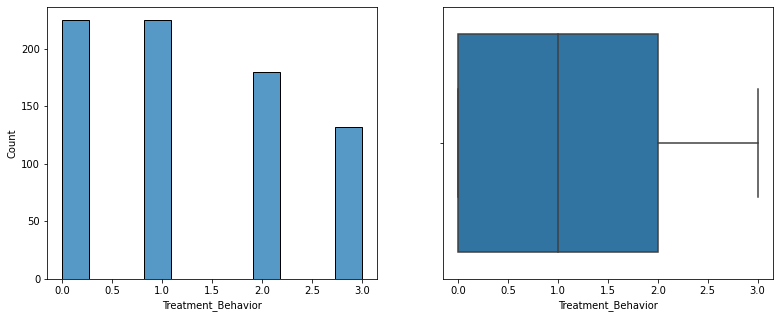

In [12]:
check_distribution(training_data_imputed)

In [13]:
def remove_outliers(data_matrix_imputed):
  #https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
  # we used mean+-3sigma technique and capping for replacing outliers with highest and lowest values
  for col in data_matrix_imputed:
    upper_limit = data_matrix_imputed[col].mean() + 3*data_matrix_imputed[col].std()
    lower_limit = data_matrix_imputed[col].mean() - 3*data_matrix_imputed[col].std()
    data_matrix_imputed[col] = np.where(
      data_matrix_imputed[col]>upper_limit, upper_limit,
      np.where(data_matrix_imputed[col]<lower_limit, lower_limit, data_matrix_imputed[col]
          )
      )

In [14]:
# removed the outliers of dataset to handle extremities
remove_outliers(training_data_imputed)

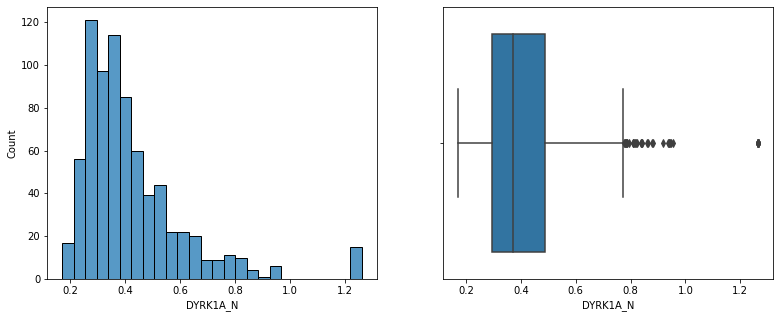

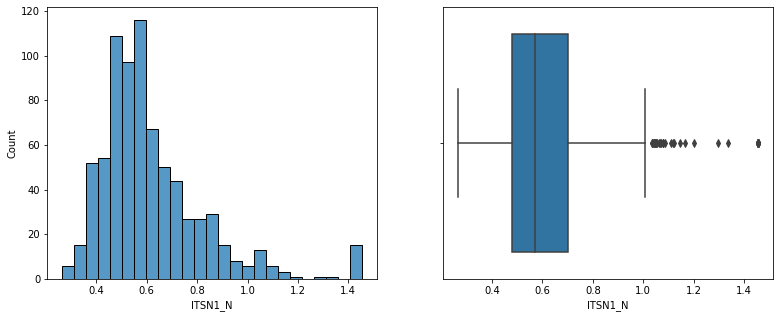

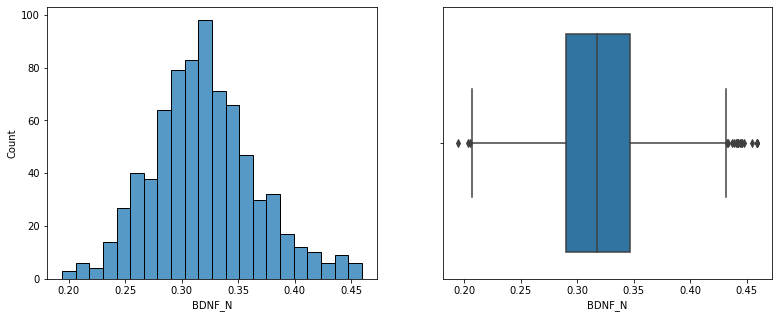

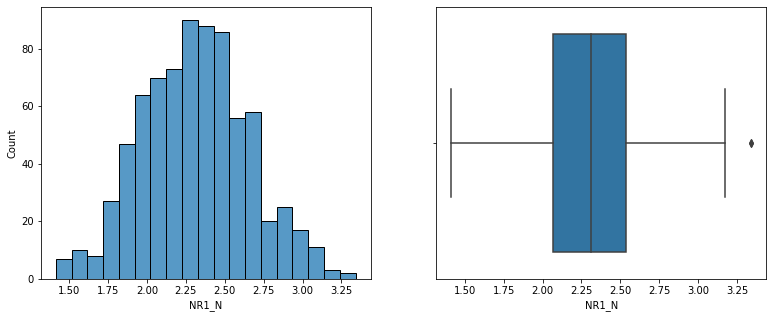

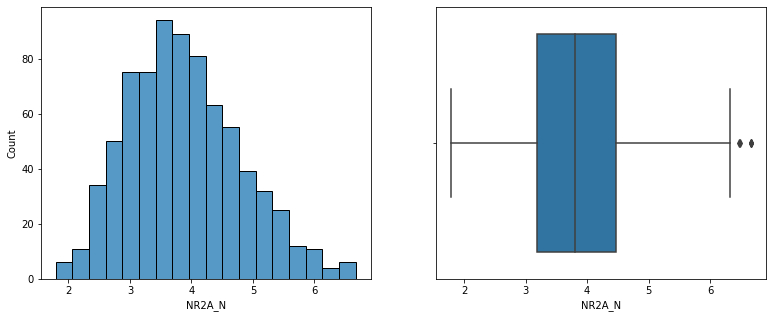

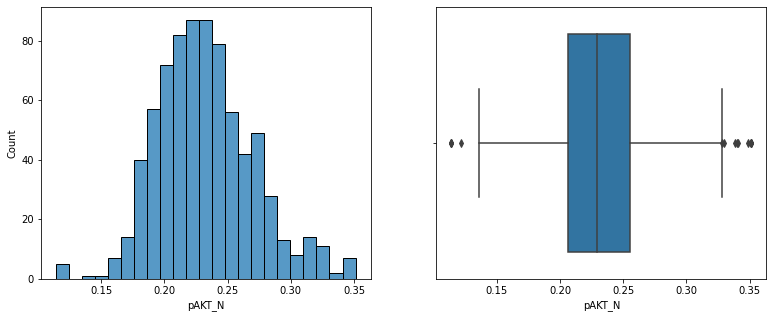

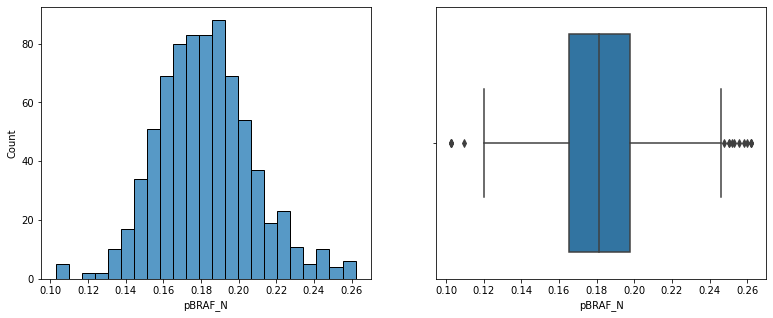

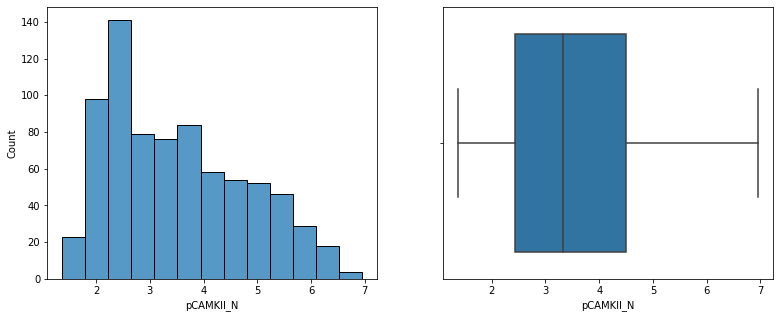

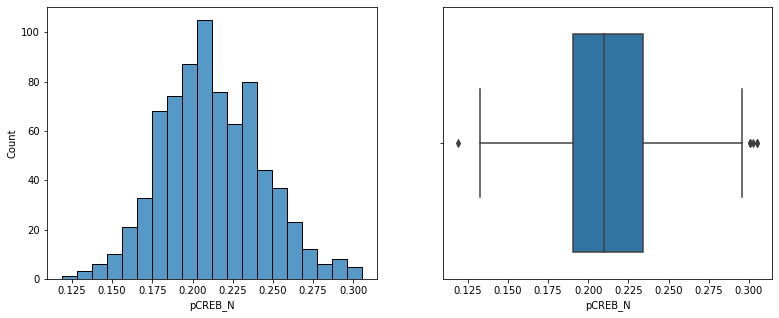

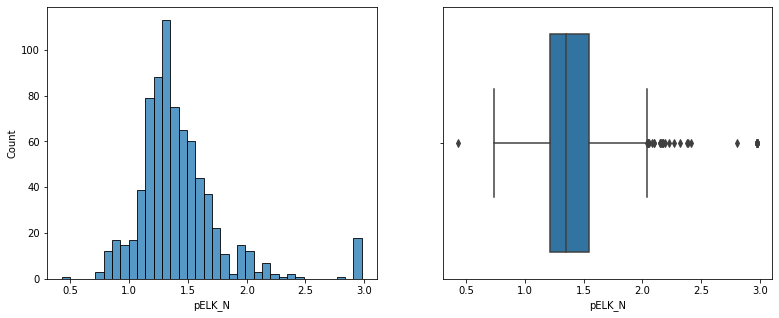

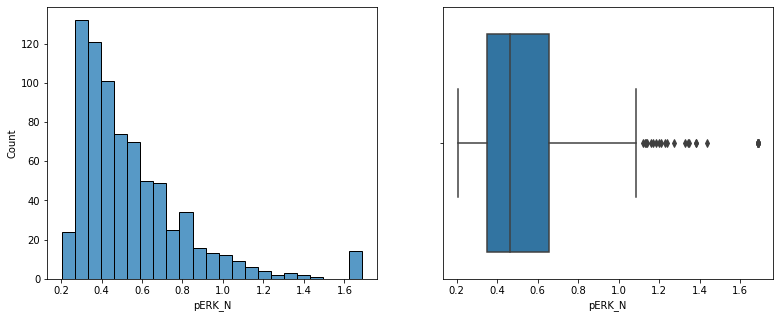

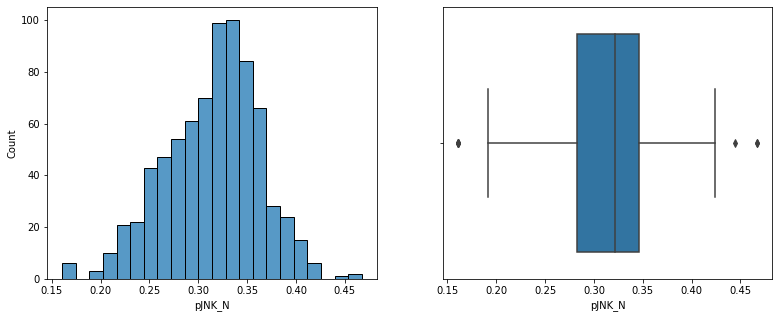

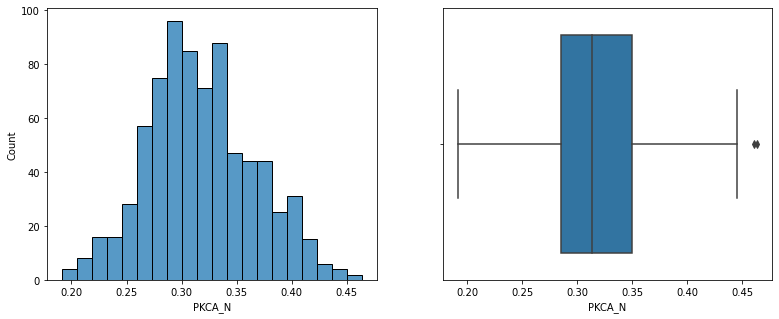

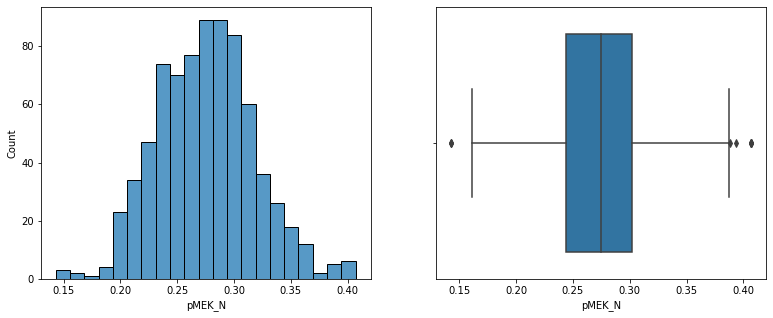

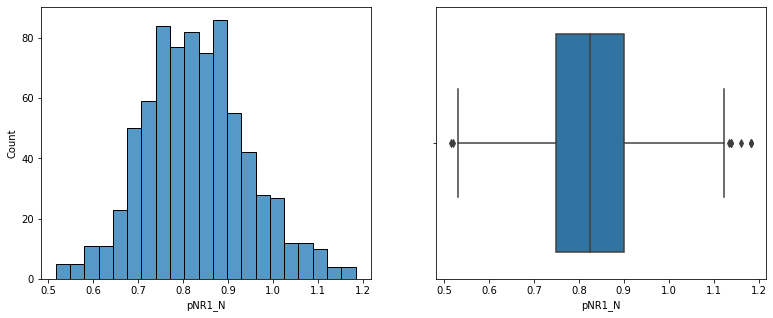

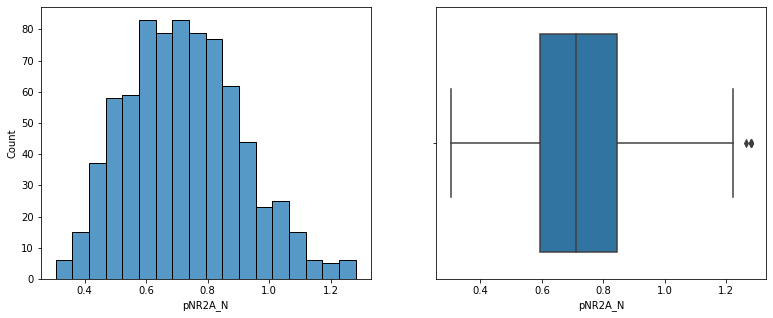

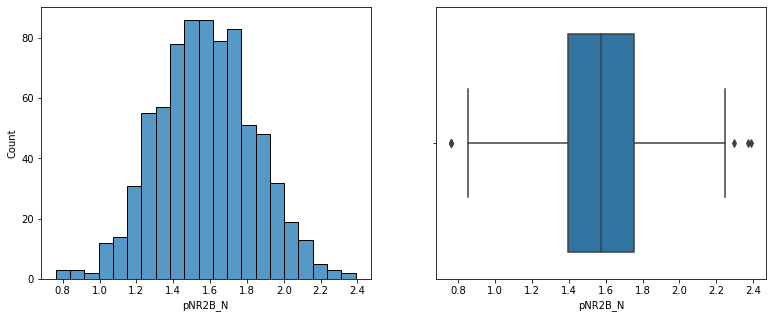

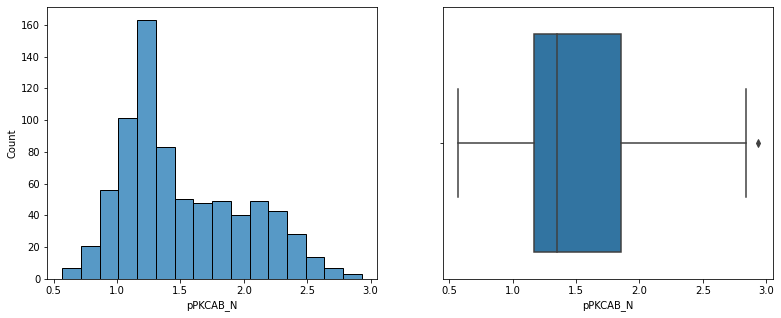

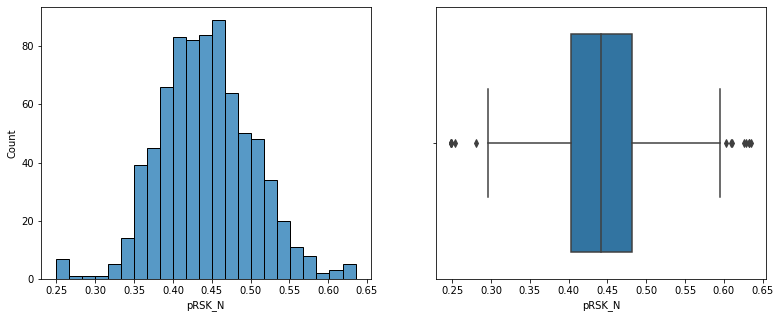

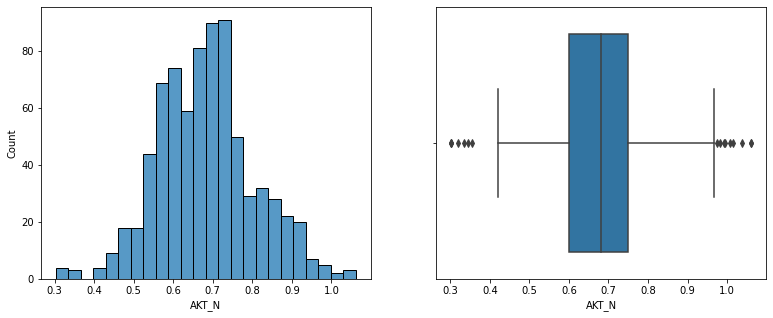

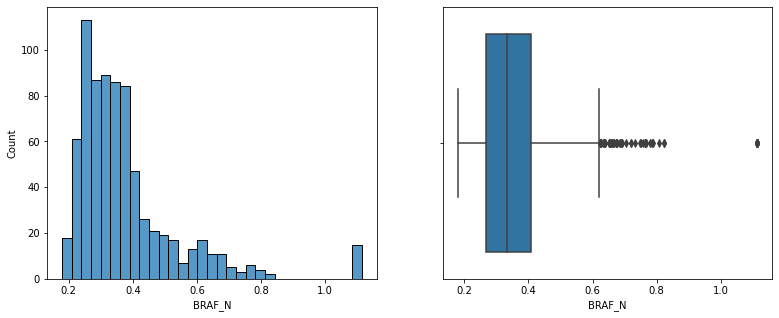

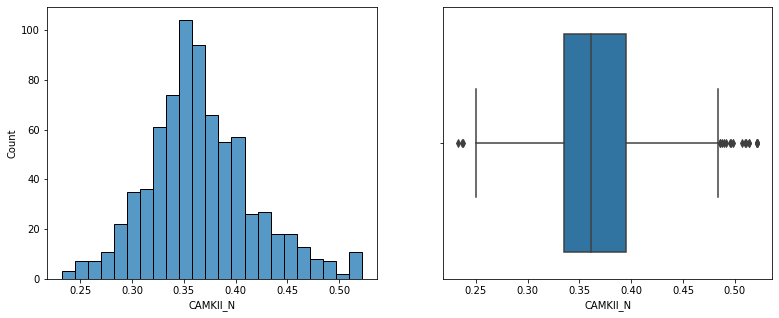

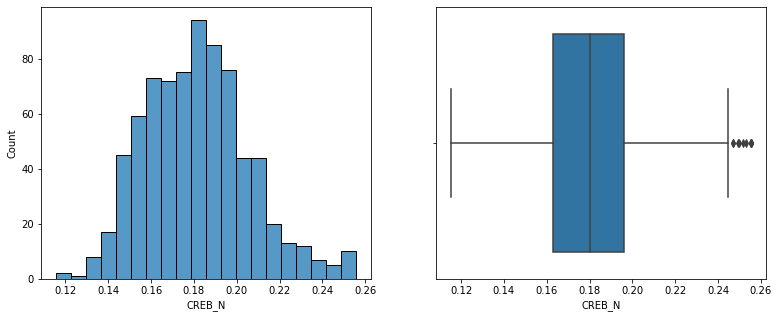

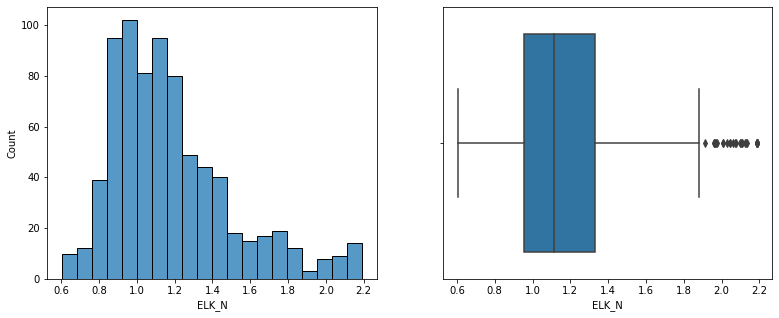

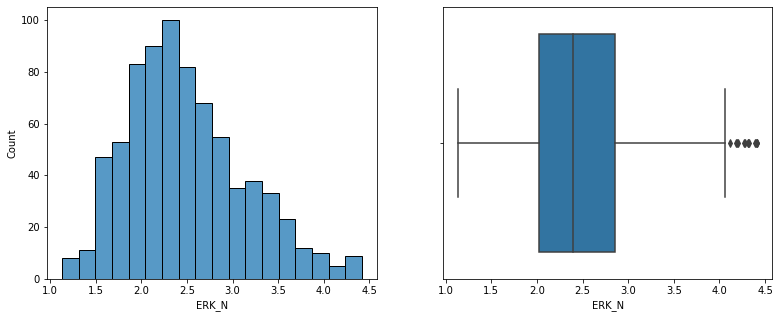

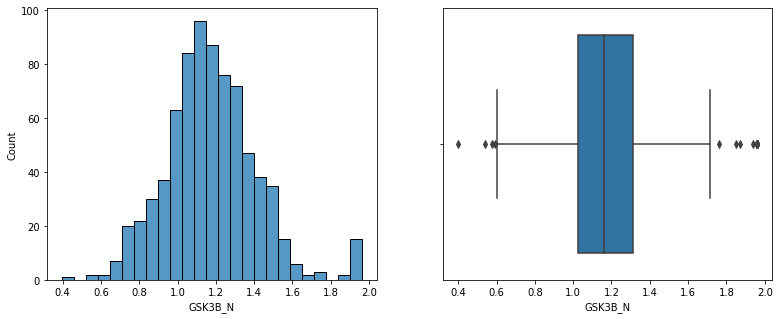

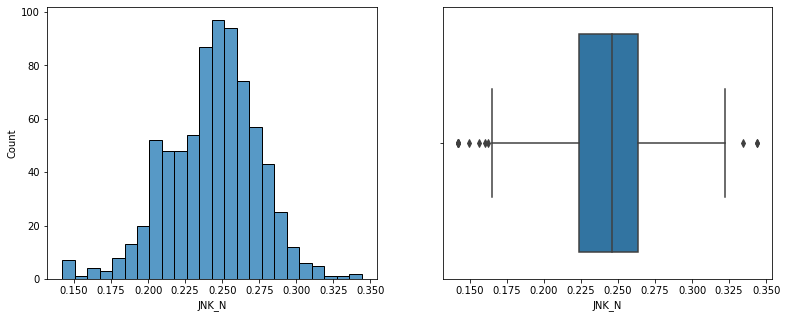

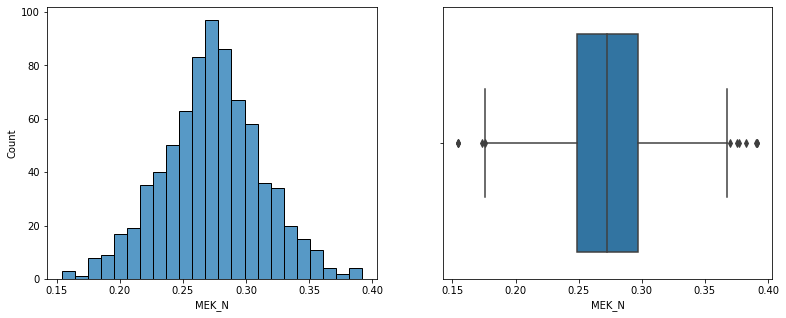

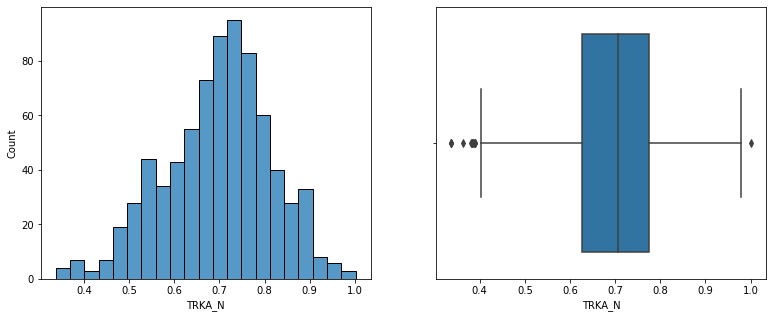

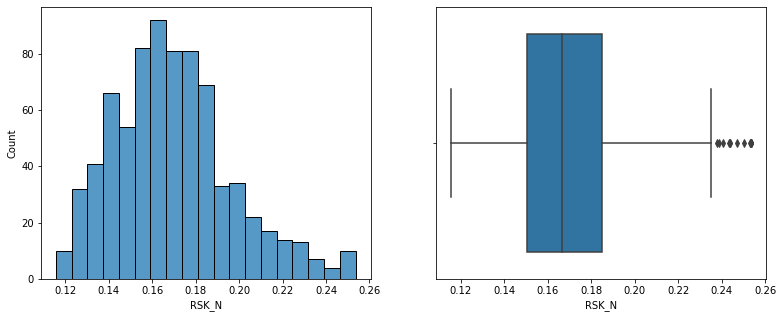

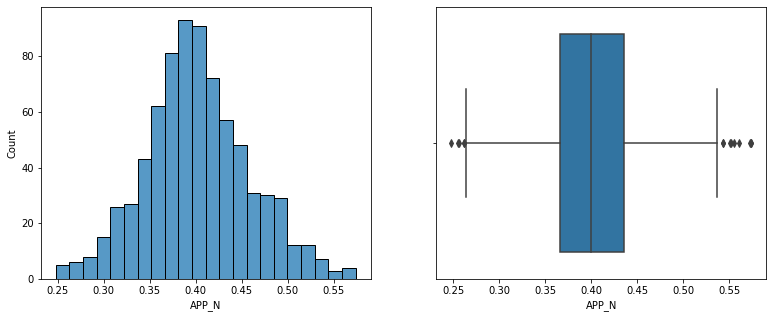

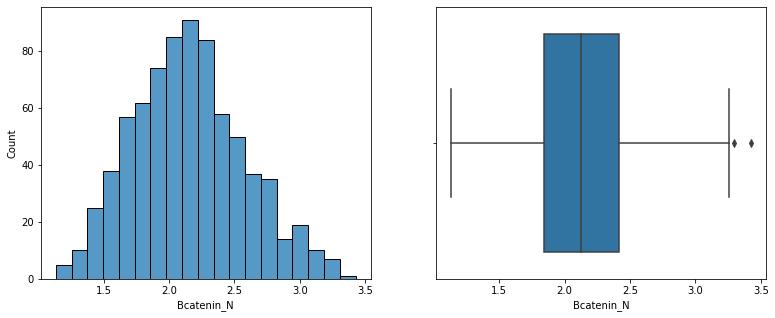

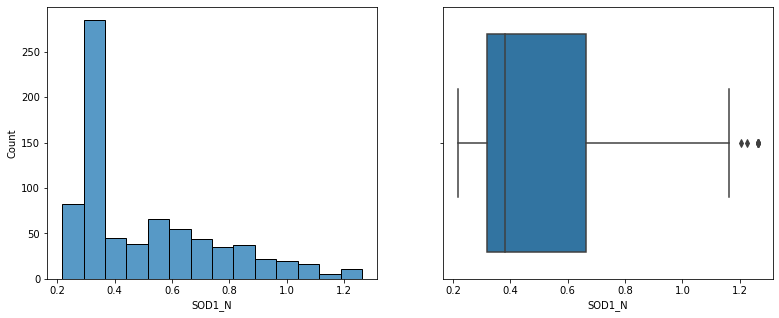

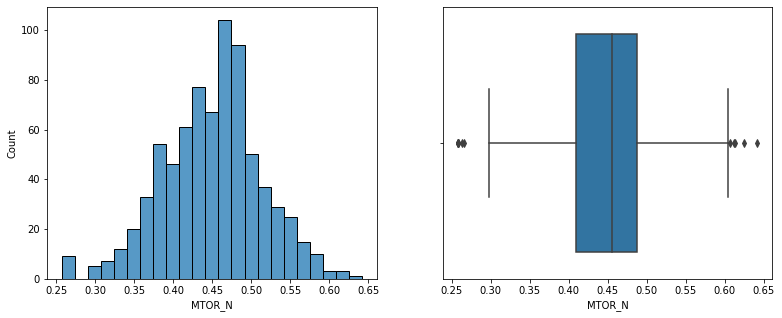

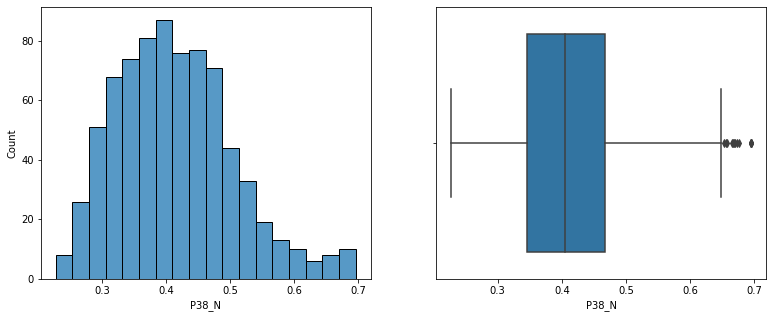

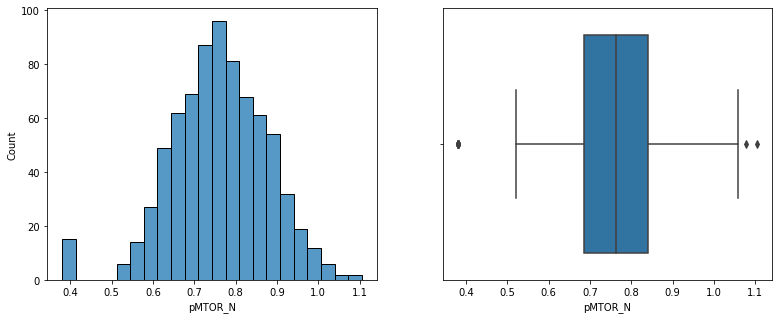

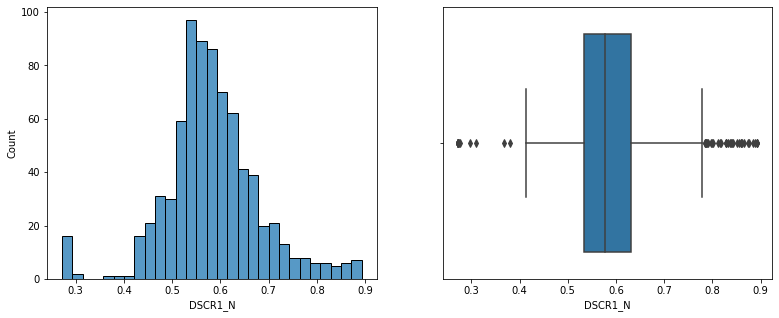

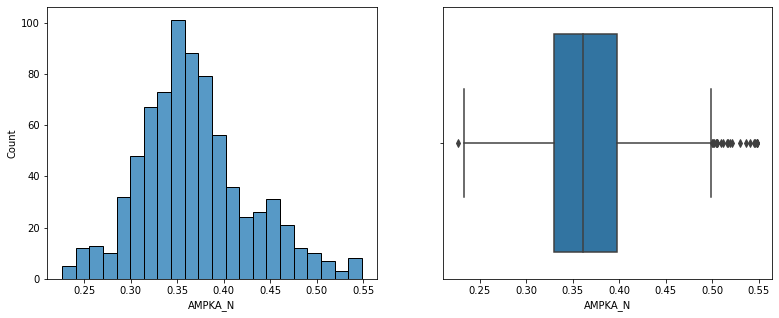

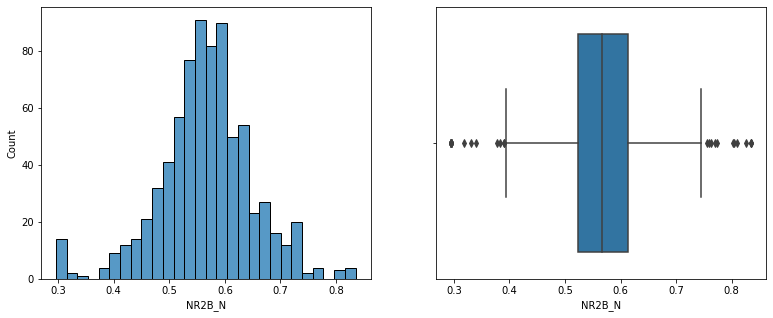

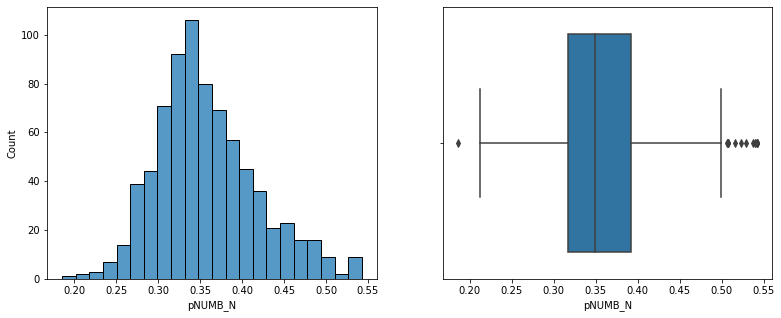

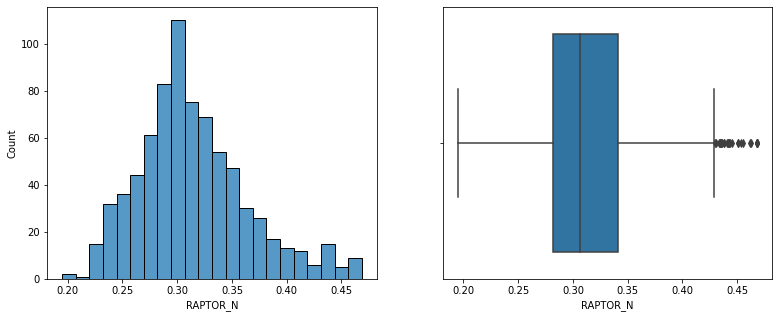

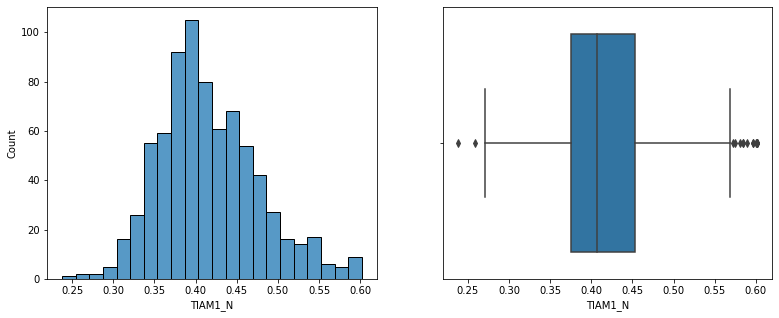

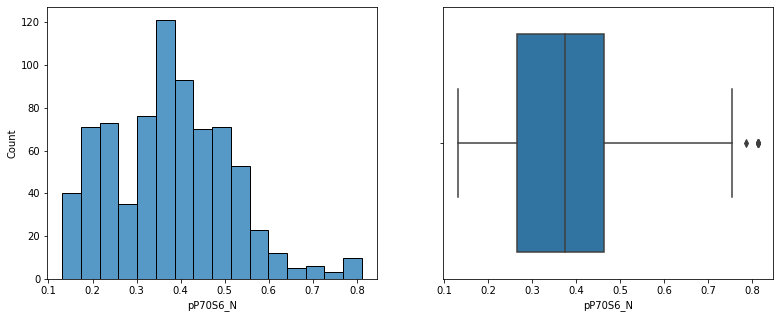

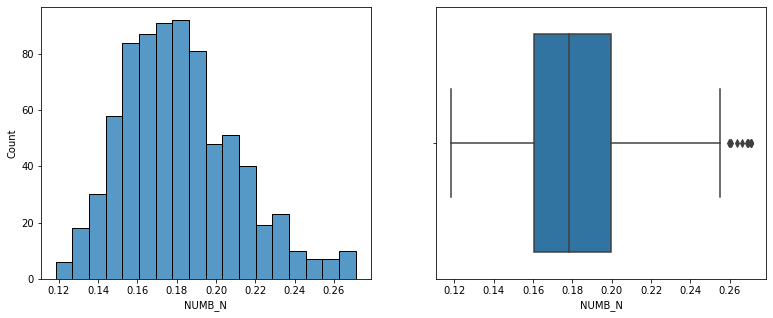

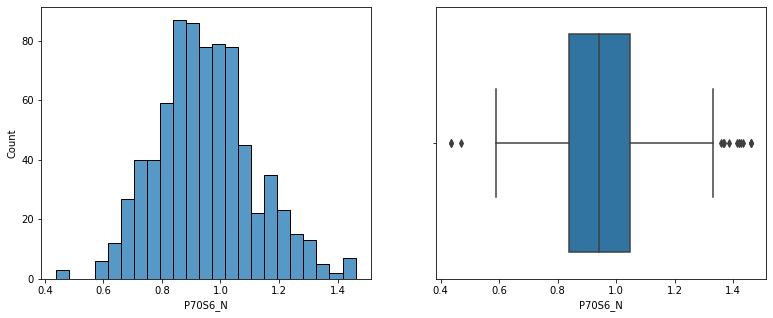

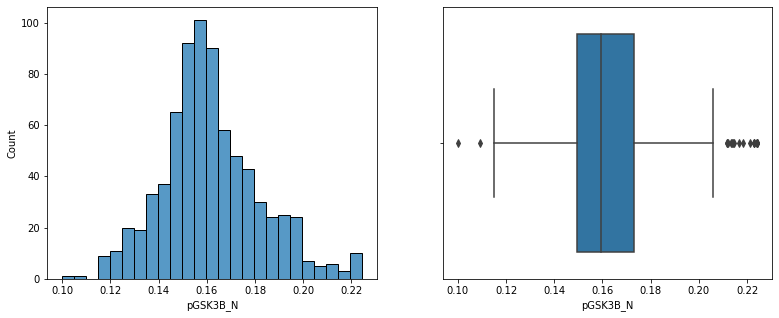

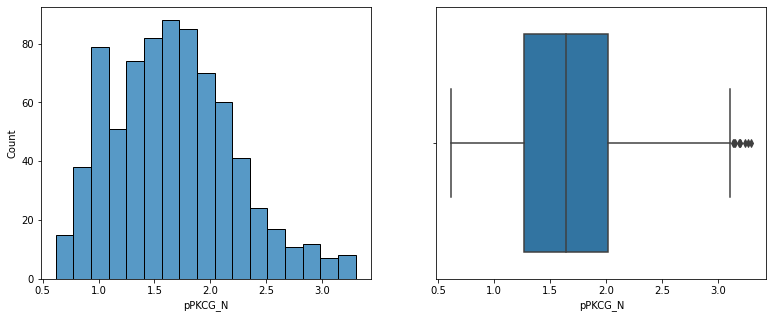

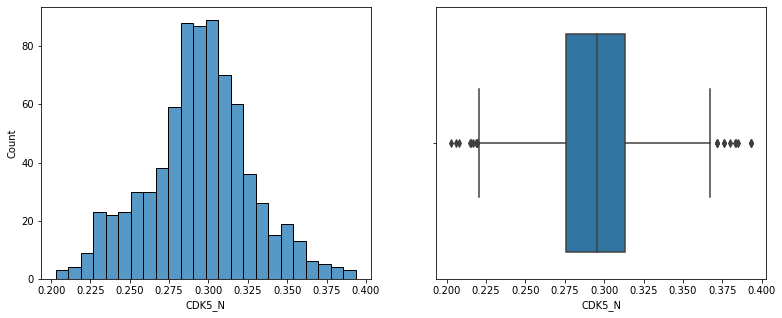

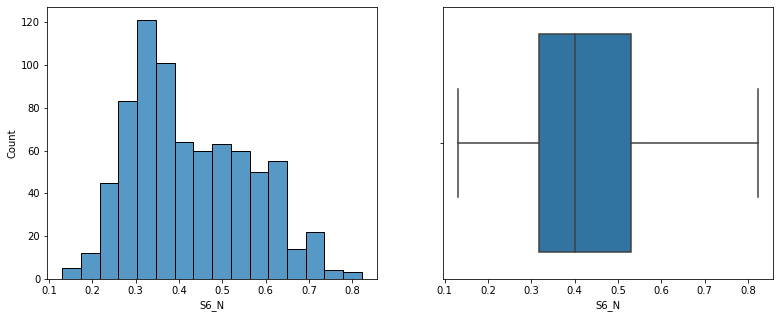

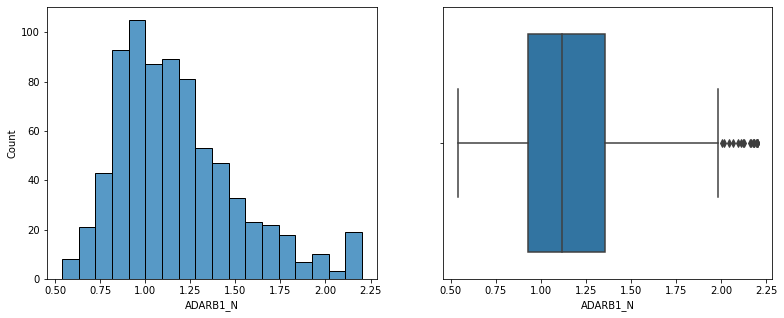

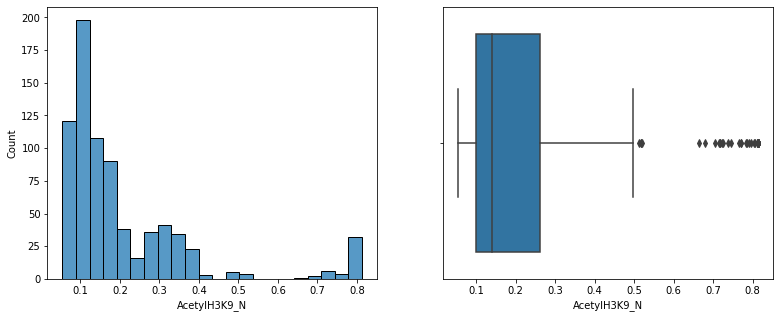

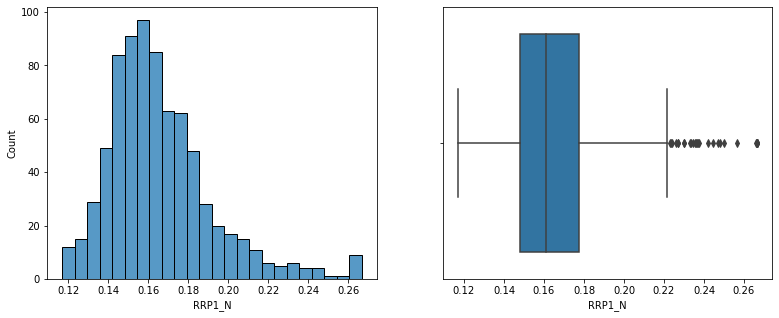

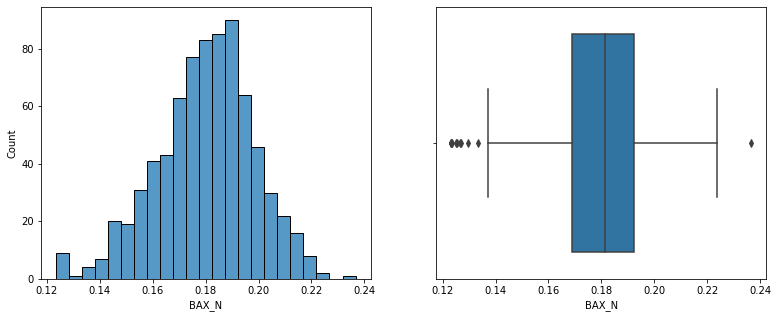

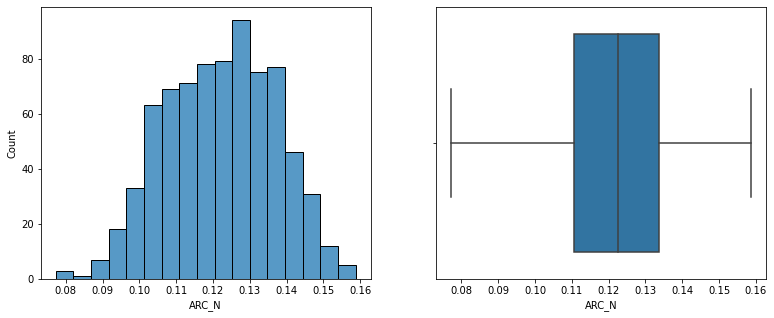

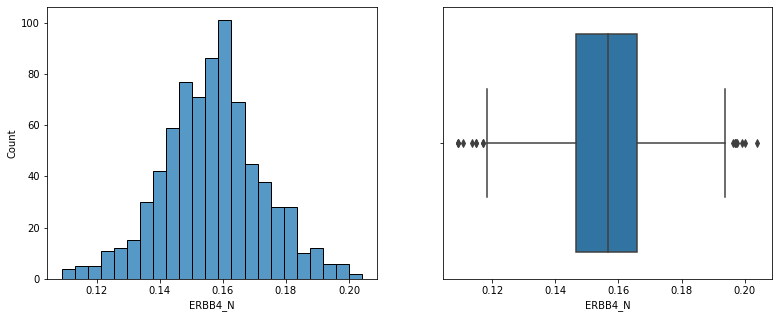

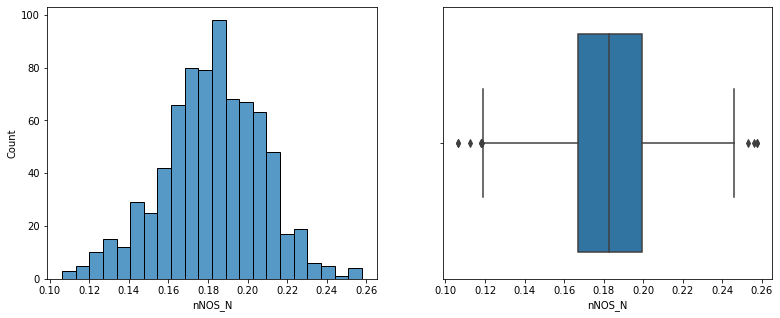

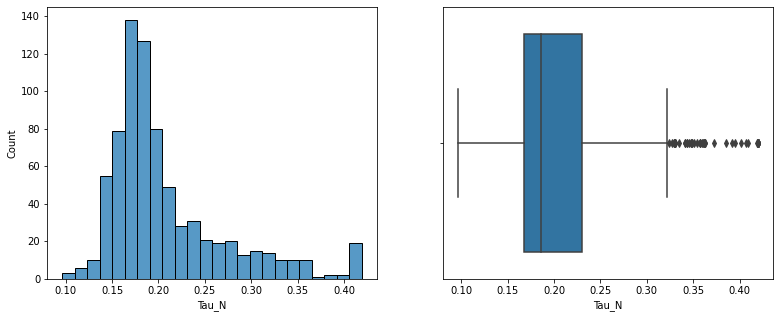

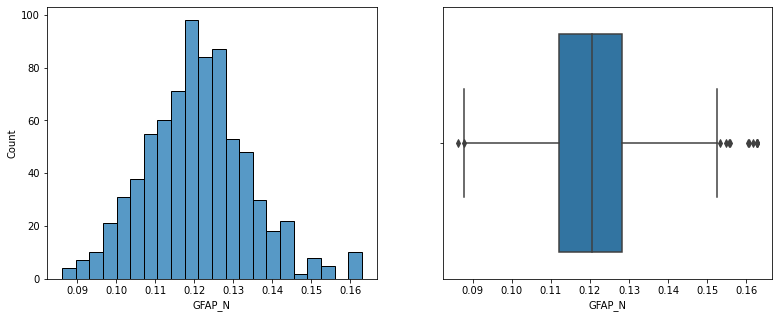

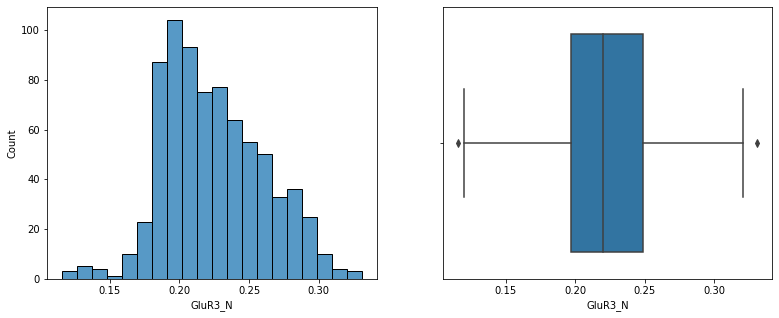

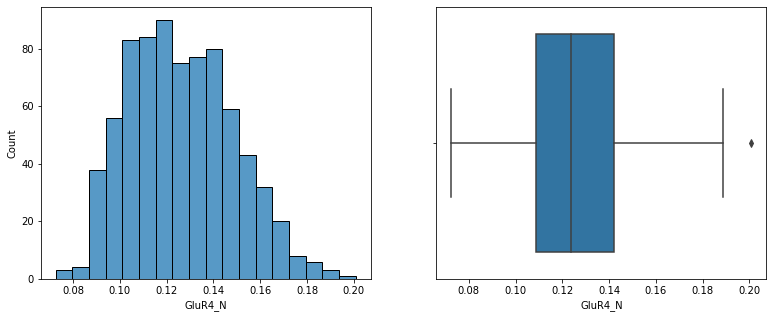

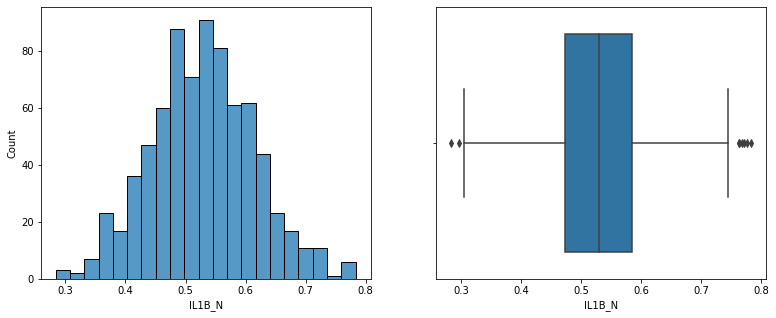

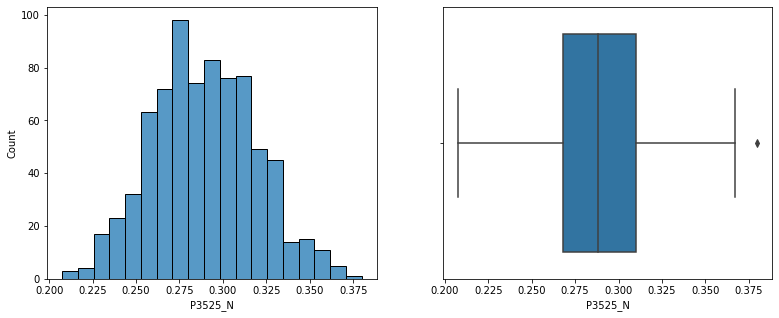

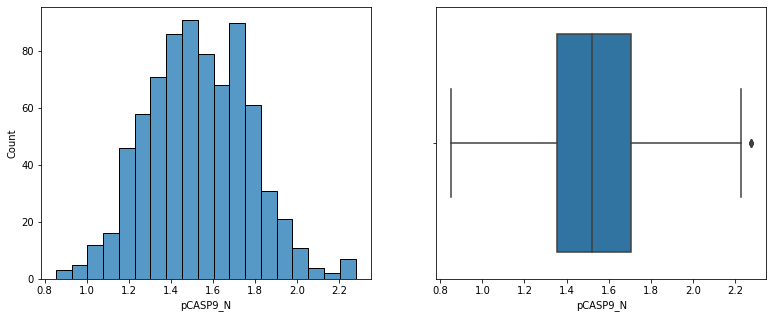

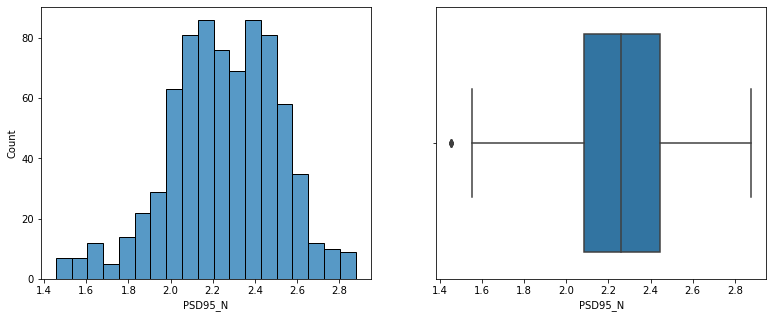

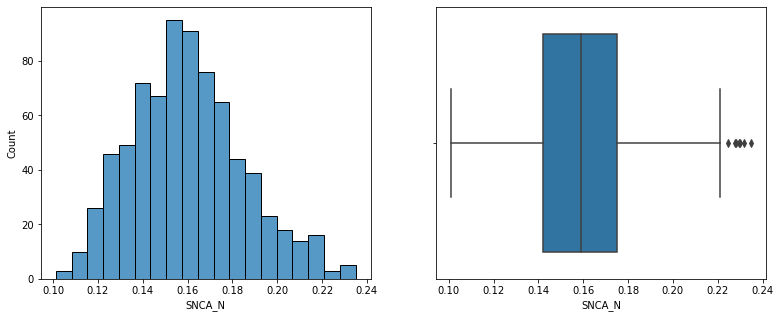

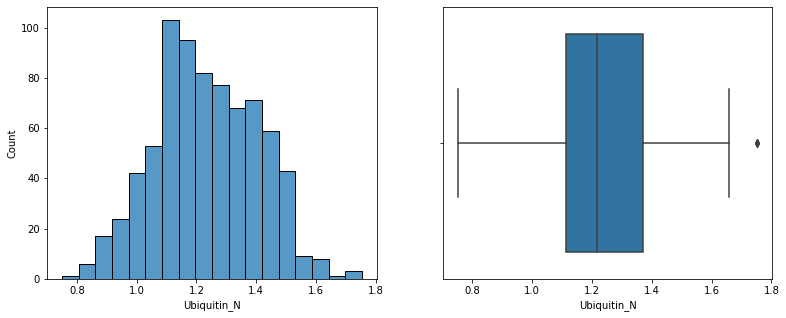

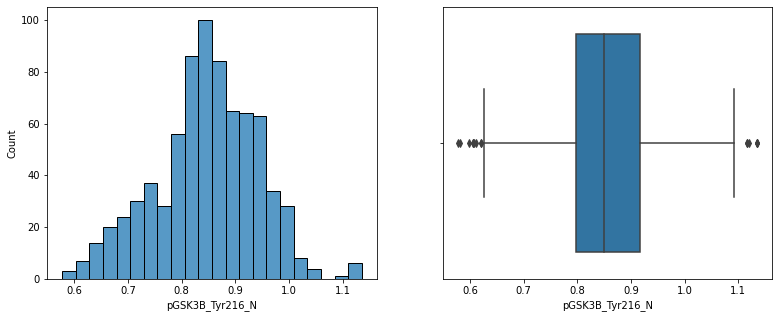

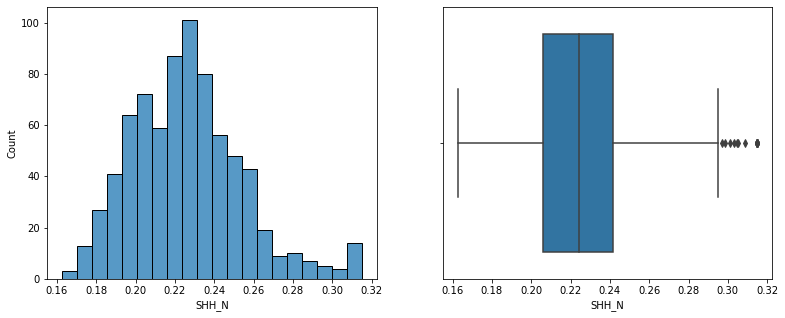

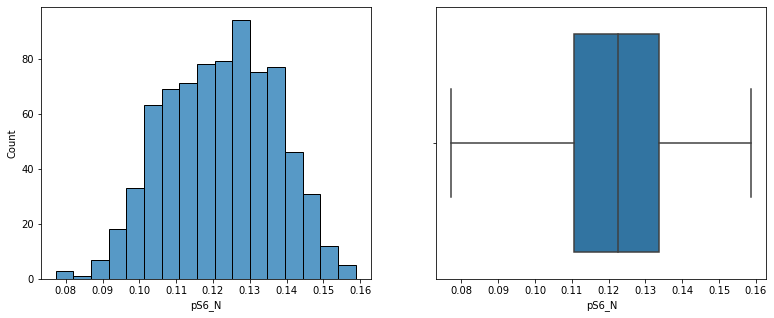

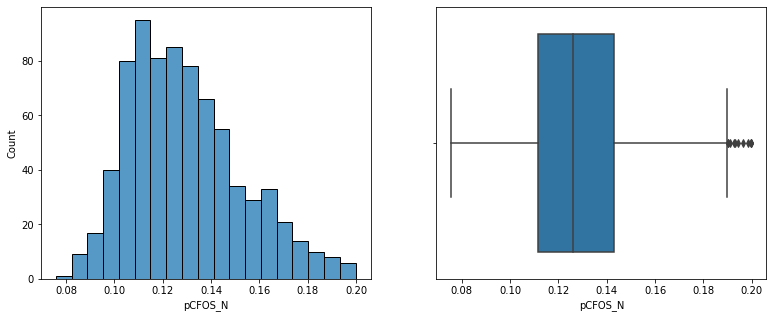

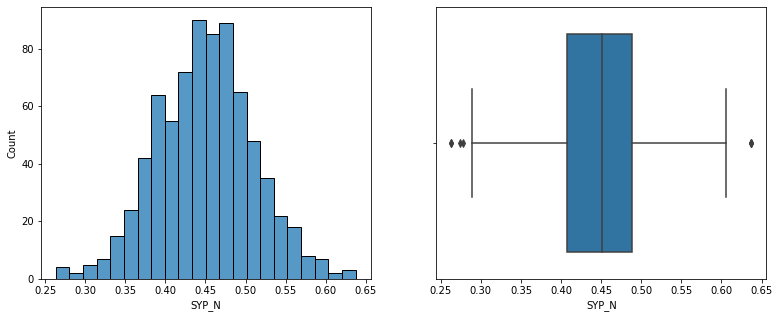

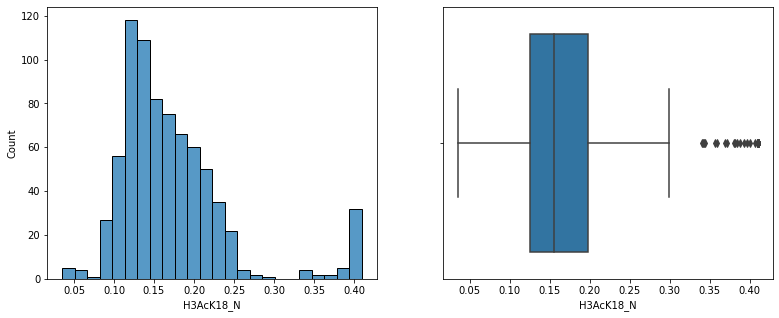

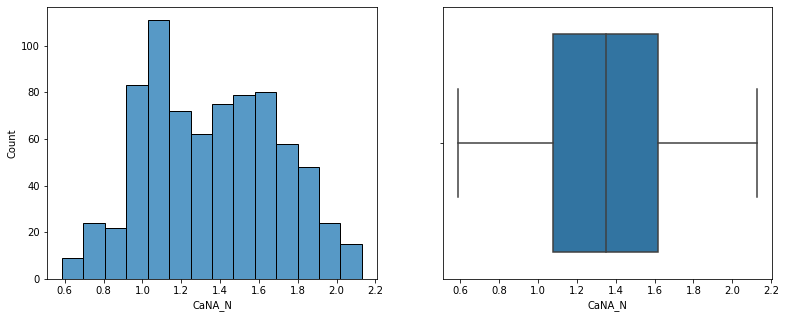

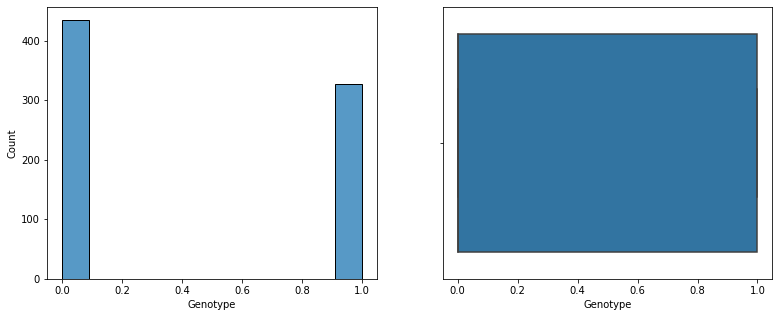

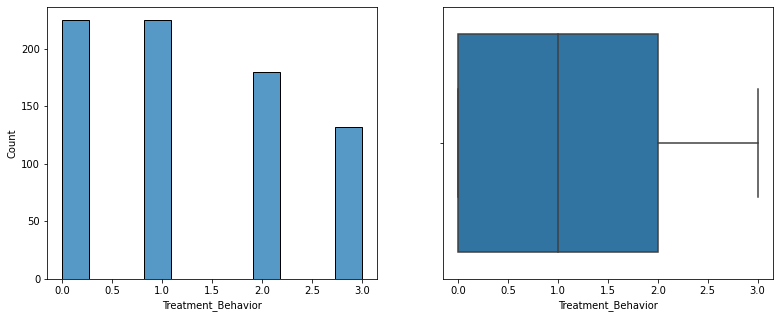

In [15]:
# Checked distribution after removing outliers whether actually data got compromised or it is safe
check_distribution(training_data_imputed)

### Removing Highly Correlated Columns

In [16]:
def remove_highly_corelated(data_matrix_imputed):
  #  Referred from https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
  
  # unstacking the values of correlation matrix, sorting values according to highest and dropping the duplicate values
  high_corr_val = data_matrix_imputed.corr().abs().unstack().sort_values().drop_duplicates()
  
  # took 0.90 as threshold to find highly correlated variables
  high_corr_cols = high_corr_val[((high_corr_val >= 0.90) | (high_corr_val <= -0.90 ))&  (high_corr_val != 1.00 ) ] 
  # converted into DataFrame
  high_corr_cols = pd.DataFrame(high_corr_cols)

  # found 9 variable pairs having high correlation amongst the hence removing respective column
  # resetiing index to find unique names of columns to remove
  high_corr_cols = high_corr_cols.reset_index()  
  
  # to find uniqe names of values of column in highly correlated data matrix
  to_drop_cols = []  # created null set
  a = list(high_corr_cols.level_0.unique())
  b = list(high_corr_cols.level_1.unique())
  to_drop_cols = np.append(to_drop_cols,a,axis=0)
  to_drop_cols = np.append(to_drop_cols,b,axis=0)
  
  # removing highly correlated 8 columns
  data_matrix_cleaned = data_matrix_imputed.drop(np.unique(to_drop_cols), axis=1)
  return data_matrix_cleaned, to_drop_cols

In [17]:
# Storing columns to drop and final cleaning data
training_data_cleaned,dropped_corr_cols = remove_highly_corelated(training_data_imputed)
# adding two lists of columns to drop from datasets 
dropped_cols = dropped_miss_cols + list(dropped_corr_cols)

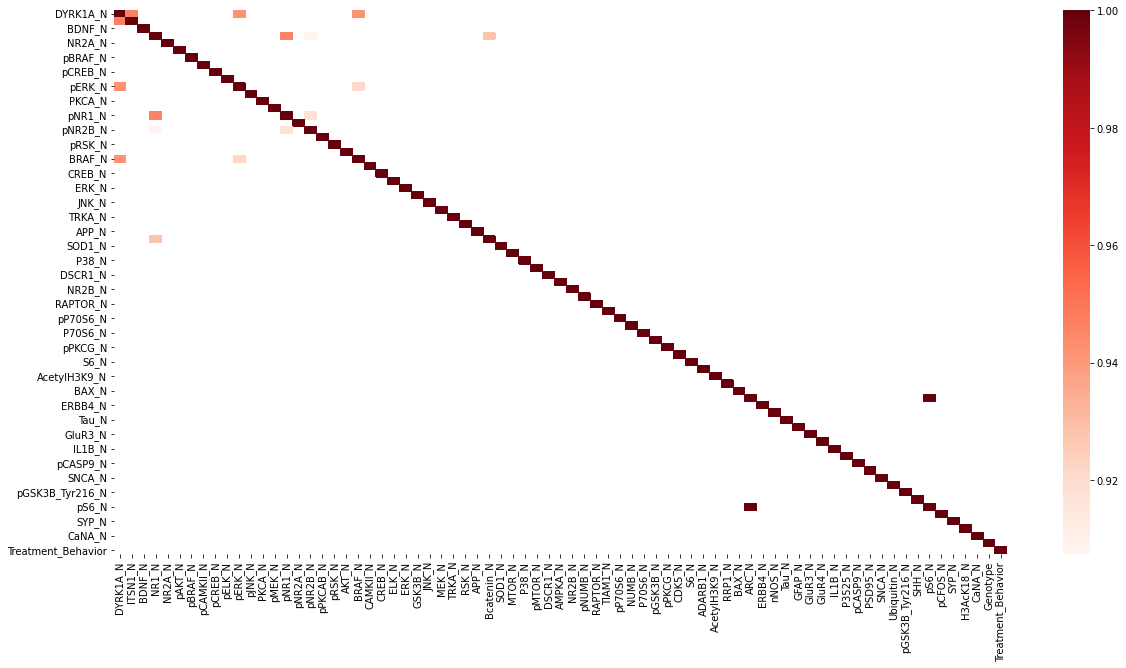

In [18]:
# Checking the correlation statistics for visualisation
high_corr = training_data_imputed.corr().abs()[((training_data_imputed.corr().abs() >= 0.90) | (training_data_imputed.corr().abs() <= -0.90 ))]
# creating visualsastion for understanding the correlation
plt.figure(figsize=(20,10))
sns.heatmap(high_corr, cmap="Reds")

### Checking Class Label Balance

In [19]:
# get alues of distinct classes count
pd.value_counts(training_data_cleaned.Genotype)

0.0    435
1.0    327
Name: Genotype, dtype: int64

In [20]:
pd.value_counts(training_data_cleaned.Treatment_Behavior)

0.0    225
1.0    225
2.0    180
3.0    132
Name: Treatment_Behavior, dtype: int64

## **Observations**
* Column 'BRAF_N' 'Bcatenin_N' 'DYRK1A_N' 'ITSN1_N' 'NR1_N' 'pERK_N' 'pNR1_N' 'pNR2B_N' are having high correlation coefficient values hence this seven columns can be removed to remove redundancy.
* Classes are not balanced for 'Genotype'i.e.435 in frst class and 327 in second class
* Classes are not balanced for 'Treatment_Behavior''s classes 0,1,2,3 with count 225,225,180,132 respectively




## Installing Libraries Required for ML Models

In [21]:
pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [22]:
pip install eli5

     |████████████████████████████████| 106 kB 5.1 MB/s 


In [23]:
pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


## Importing Libraries Used in ML Models

In [197]:
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from scikeras.wrappers import KerasClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.utils.estimator_checks import check_estimator
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

## Normalising the Dataset for further ML Predictions 

In [141]:
def normal(X):
  scaler = StandardScaler()
  scaler.fit(X.values)
  X_normal = scaler.transform(np.array(X.values))
  X_normal = pd.DataFrame(X_normal,columns =X.columns)
  return X_normal

## Splitting the Dataset into features and classes

In [143]:
# Function to split data into features and classes
def splitXY(InputData):
  X = pd.DataFrame(InputData.iloc[:,:-2]) #features
  X = normal(X)
  y_B = pd.DataFrame(InputData.iloc[:,-2:-1]) # for binary classes
  y_M = pd.DataFrame(InputData.iloc[:,-1:]) #for multiple classes
  return X, y_B, y_M

##Splitting Dataset into Training and Validation Dataset

In [144]:
#splitting dataset into fetures and classes
X_train, Y_train_B, Y_train_M = splitXY(training_data_cleaned)

# Spliting the datasets into training and validation data for binary classes
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train_B.values.ravel(), random_state=1)

# Spliting the datasets into training and validation data for binary classes
x_train_m, x_val_m, y_train_m, y_val_m= train_test_split(X_train, Y_train_M.values.ravel(), random_state=1)

In [87]:
# Function for finding accuracy metrics
def accuracy_tests(y_test, y_pred):
  ac = metrics.accuracy_score(y_test, y_pred)
  ba = metrics.balanced_accuracy_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred,average='micro')
  print("\nThe accuracy metrics for given values are: \n1)Accuracy_score :-", ac, "\n2)Balanced_accuracy_score :-", ba," \n3)F1_score :-",f1)

# Tuning Hyperparameters

## Elastic Net Logistic Regression Model


In [345]:
#code for tuning hyperparameters for biary classification using elastic net and 5 fold cross validation
def log_reg_classification(X_train,Y_train,classes):
  # applied model
  model = LogisticRegression()  

  # Taken hyperparamters like regularisation parameter and l1_ratios
  c_values = [1e+4,1000, 100, 10, 1.0, 0.1, 0.01]   
  l1_ratios = np.arange(0.,1,0.2)

  # If multiple classes are there use multinomial otherwise keep it in auto mode for better predictions
  if classes !=2: multi_class = ['multinomial']
  else: multi_class = ['auto']
  
  # define grid search for tuning best hyperparameters
  grid = dict(solver=['saga'],penalty=['elasticnet'],multi_class =multi_class ,C=c_values,l1_ratio=l1_ratios, max_iter=[5000])

  # cross validation = 5  and scoring as accuracy
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
  log_reg_model = grid_search.fit(X_train,Y_train)
  return log_reg_model.best_params_

In [ ]:
# calculating best parameters for dataset for binary classes
best_params_log_reg_B = log_reg_classification(x_train, y_train,2)

# Time required to tune parameters is 3m 53s

# Found out the best parameters for binary classification is 
# {'C': 1.0,'l1_ratio': 0.0,'max_iter': 5000, 'multi_class': 'auto','penalty': 'elasticnet','solver': 'saga'}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_log_reg_B = LogisticRegression(C = 1.0, l1_ratio= 0.0, max_iter= 5000, penalty = 'elasticnet', solver= 'saga')

# fitting this model on validation dataset
train_log_reg_B.fit(x_train, y_train)

# finding the accuracy scores
print("Binary Classification Score on training dataset is :", train_log_reg_B.score(x_train,y_train), "and on Validation Dataset is :", train_log_reg_B.score(x_val,y_val))

# Finding predictions for understanding differnt accuracy metrics
predictions_log_reg_B = train_log_reg_B.predict(x_val)

#Running Accuracy Tests
accuracy_tests(y_val, predictions_log_reg_B)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val, predictions_log_reg_B))

In [ ]:
# calculating best parameters for dataset for Multiclasses
best_params_log_reg_M = log_reg_classification(x_train_m, y_train_m,4)

# time required to tune parameters is 4m 07s

# Found out the best parameters for multiclass classification is 
# {'C': 10000,'l1_ratio': 0.0,'max_iter': 5000, 'multi_class': 'auto','penalty': 'elasticnet','solver': 'saga'}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_log_reg_M = LogisticRegression(C = 10000, l1_ratio= 0.0, max_iter= 5000, penalty = 'elasticnet', solver= 'saga')

# fitting this model on validation dataset
train_log_reg_M.fit(x_train_m, y_train_m)

# finding the accuracy scores
print("Multiclass Classification Score on training dataset is :", train_log_reg_M.score(x_train_m,y_train_m), "and on Validation Dataset is :", train_log_reg_M.score(x_val_m,y_val_m))

# Finding predictions for understanding differnt accuracy metrics
predictions_log_reg_M = train_log_reg_M.predict(x_val_m)

#Running Accuracy Tests
accuracy_tests(y_val_m, predictions_log_reg_M)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val_m, predictions_log_reg_M))

## SVM Clasification

In [ ]:
# Fuction for tuning hyperparamters and finding the best paramters
def svm_classification(X_train,Y_train):

  # Took reasonable values of hyperparameters for tuning
  c_values = [100, 10, 1.0,5,10, 50, 0.1, 0.01]
  kernel = ['linear', 'poly', 'rbf', 'sigmoid']
  gamma = [0.0001, 0.0005, 0.001, 0.005,0.01, 0.05, 'scale']

  # Created Grid and Classifier for gridsearch
  svm_grid = dict(kernel=kernel, gamma=gamma, C=c_values)
  svclassifier = SVC()

  #Running Gridsearch Algorithm for tuning best paramters and returning the same
  svm_search = GridSearchCV(estimator = svclassifier , param_grid=svm_grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
  svm_model = svm_search.fit(X_train,Y_train)
  return svm_model.best_params_

In [ ]:
# calculating best parameters for dataset for binary classes
best_params_SVC_B = svm_classification(x_train, y_train)

# Time required to tune parameters is 50s

# Found out the best parameters for binary classification 
# {'C': 10,'gamma': 0.005,'kernel': 'rbf'}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_SVC_B = SVC(C =10, gamma = 0.005, kernel = 'rbf')

# fitting this model on validation dataset
train_SVC_B.fit(x_train, y_train)

# finding the accuracy scores
print("Binary Classification Score on training dataset is :", train_SVC_B.score(x_train,y_train), "and on Validation Dataset is :", train_SVC_B.score(x_val,y_val))

# Finding predictions for understanding differnt accuracy metrics
predictions_SVC_B = train_SVC_B.predict(x_val)

#Running Accuracy Tests
accuracy_tests(y_val, predictions_SVC_B)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val, predictions_SVC_B))

In [ ]:
# calculating best parameters for dataset for binary classes
best_params_SVC_M = svm_classification(x_train_m, y_train_m)

# Time required to tune parameters is 29s

# Found out the best parameters for binary classification 
# {'C': 100,'gamma': 0.01,'kernel': 'rbf'}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_SVC_M = SVC(C =100, gamma = 0.01, kernel = 'rbf')

# fitting this model on validation dataset
train_SVC_M.fit(x_train_m, y_train_m)

# finding the accuracy scores
print("Multiclass Classification Score on training dataset is :", train_SVC_M.score(x_train_m,y_train_m), "and on Validation Dataset is :", train_SVC_M.score(x_val_m,y_val_m))

# Finding predictions for understanding differnt accuracy metrics
predictions_SVC_M = train_SVC_M.predict(x_val_m)

#Running Accuracy Tests
accuracy_tests(y_val_m, predictions_SVC_M)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val_m, predictions_SVC_M))

## Random Forest-Classification

In [ ]:
# Function for tuning best hyperparameters of RF classificaion
def random_forest_classification(X_train,Y_train):

  #took reasonable values of hyperparamters for tuning model
  max_features = ['auto','sqrt']
  max_depth = [5,10, 20, 30]
  max_leaf_nodes = [4,10,20]
  min_samples_split = [2, 5, 10]
  n_estimators = [10,50,100,200]

  # created grid for gridsearch
  rf_grid = dict(n_estimators=n_estimators, min_samples_split=min_samples_split, max_leaf_nodes=max_leaf_nodes, max_depth =max_depth, max_features =max_features)

  # Carried out Gridsearch Algorithm for finding best hyperparameters
  rf_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=rf_grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
  random_forest_model = rf_search.fit(X_train,Y_train)
  return random_forest_model.best_params_

In [ ]:
# calculating best parameters for dataset for binary classes
best_params_RF_B = random_forest_classification(x_train, y_train)

# Time required to tune parameters is 6m 13s

# Found out the best parameters for binary classification 
# {'max_depth': 10,'max_features': 'auto','max_leaf_nodes': 20,'min_samples_split': 2,'n_estimators': 100}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_RF_B = RandomForestClassifier(max_depth =10,max_features ='auto',max_leaf_nodes= 20, min_samples_split=2,n_estimators=100)

# fitting this model on validation dataset
train_RF_B.fit(x_train, y_train)

# finding the accuracy scores
print("Binary Classification Score on training dataset is :", train_RF_B.score(x_train,y_train), "and on Validation Dataset is :", train_RF_B.score(x_val,y_val))

# Finding predictions for understanding differnt accuracy metrics
predictions_RF_B = train_RF_B.predict(x_val)

#Running Accuracy Tests
accuracy_tests(y_val, predictions_RF_B)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val, predictions_RF_B))

In [ ]:
# calculating best parameters for dataset for binary classes
best_params_RF_M = random_forest_classification(x_train_m, y_train_m)

# Time required to tune parameters is 4m 40s

# Found out the best parameters for binary classification 
# {'max_depth': 20,'max_features': 'auto','max_leaf_nodes': 20,'min_samples_split': 10,'n_estimators': 200}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_RF_M = RandomForestClassifier(max_depth =20,max_features ='auto',max_leaf_nodes= 20, min_samples_split = 10,n_estimators=200)

# fitting this model on validation dataset
train_RF_M.fit(x_train_m, y_train_m)

# finding the accuracy scores
print("Multiclass Classification Score on training dataset is :", train_RF_M.score(x_train_m,y_train_m), "and on Validation Dataset is :", train_RF_M.score(x_val_m,y_val_m))

# Finding predictions for understanding differnt accuracy metrics
predictions_RF_M = train_RF_M.predict(x_val_m)

#Running Accuracy Tests
accuracy_tests(y_val_m, predictions_RF_M)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val_m, predictions_RF_M))

## Neural Network 

### One Hot Encoding For Dataset

In [ ]:
# doing one hot_encoding for neural network classification
y_train_me = to_categorical(y_train_m) # multiclass target training
y_val_me = to_categorical(y_val_m)  # multiclass target validation
y_train_e = to_categorical(y_train) # binaryclass target training
y_val_e = to_categorical(y_val) # binaryclass target validation

### Making Predictions based on NN- Model Classification

In [ ]:
# As NN model gives predictions in form of score we decoded this score as predictions of class using following functions
def nn_predict(model,x):
  predictions = np.argmax(model.predict(x), axis=-1)
  return predictions

In [ ]:
# Function for classification using Keras
def nn_classfiction(lamda,units,X_train,Y_train, classes):
  
  # Keras model and sequential for adding layers to neural network
  model = Sequential()

  # Added one hidden layer having RELU activation fuction and input dim as no of features in dataset
  model.add(Dense(units, input_dim =len(X_train.columns),  activation='relu', kernel_regularizer=l2(lamda)))

  # Hyperparameters such as No of units and lamda (which is weight decay parameter) is to be tuned
  model.add(Dense(classes, activation='softmax'))

  # Conditions to apply loss_f values
  if classes != 2: loss_f = 'categorical_crossentropy' 
  else: loss_f='binary_crossentropy'

  # compiling the model
  model.compile(loss=loss_f, optimizer='adam', metrics=['accuracy'])

  #fitting the model and returning models
  model.fit(X_train,Y_train,  epochs=150, verbose=0,  batch_size=len(X_train.columns))
  return model

In [ ]:
# Function for tuning hyperparameters of neural network classification
def params_nn_classification(X_train,Y_train,classes):

  #took reasonable values of hyperparameters for tuning the model
  values = [1e-1, 1e-2, 1e-3,100,1000]
  neurons = np.arange(50,1000,400)

  # we are iterating through for loop and not directly through gridsearch hence used Lamda_opt, units_opt
  lamda_opt,units_opt = None,None
  max_val = 0
  train_acc = 0

  #for loop to find weight decay and number of units as hyperparameter
  for lamda in values:
    for units in neurons:

          # Stored trained model of NN using iterations
          model = nn_classfiction(lamda,units,X_train,Y_train,classes)

          # stored trainning accuracy to find optimum value having highest accuracy
          _, train_acc = model.evaluate(X_train,Y_train, verbose=0)
          if train_acc > max_val:
            max_val = train_acc
            lamda_opt = lamda
            units_opt = units
  
  # Opt model which we got is again then trained using nn_classfication function
  opt_model = nn_classfiction(lamda_opt,units_opt,X_train,Y_train,classes)

  # gridsearch and crossvalidation using 5 folds 
  estimator = KerasClassifier(opt_model)
  
  #took hyperpameters
  optimizers = ['adam']
  epochs = [100,200,400]
  batch_size = [60,100,200]

  #defined grid and gridsearch
  param_grid = dict(optimizer=optimizers,epochs= epochs, batch_size= batch_size,verbose =[0])
  nn_search = GridSearchCV(estimator=estimator,param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
  nn_model = nn_search.fit(X_train,Y_train)

  #stored best parameters to return 
  best_params_nn = [nn_model.best_params_,lamda_opt,units_opt]
  return best_params_nn

In [ ]:
best_params_NN_B = params_nn_classification(x_train, y_train_e,2)

# Time required to tune parameters is 7m 37s

# Found out the best parameters for binary classification 
# {{'batch_size': 60, 'epochs': 400, 'optimizer': 'adam','lamda': 0.01, 'units': 50}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_NN_B = nn_classfiction(0.01,50,x_train,y_train_e,2)
train_NN_B_K = KerasClassifier(model=train_NN_B,  batch_size=60, epochs=400, optimizer= 'adam',verbose=0)

# fitting this model on training dataset
train_NN_B_K.fit(x_train, y_train_e)

# finding the accuracy scores
print("Binary Classification Score on training dataset is :", estimator.score(x_train, y_train_e), "and on Validation Dataset is :", estimator.score(x_val, y_val_e))

# Finding predictions for understanding differnt accuracy metrics
predictions_NN_B = nn_predict(train_NN_B_K,x_val)

#Running Accuracy Tests
accuracy_tests(y_val, predictions_NN_B)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val, predictions_NN_B))

In [ ]:
best_params_NN_M = params_nn_classification(x_train_m, y_train_me,4)

# Time required to tune parameters is 6m 12s

# Found out the best parameters for binary classification 
# {{'batch_size': 200, 'epochs': 200, 'optimizer': 'adam','lamda': 0.1, 'units': 50}

In [ ]:
# Checking this parameters on validation dataset and finding the accuracy
train_NN_M = nn_classfiction(0.1,50,x_train_m,y_train_me,4)
train_NN_M_K = KerasClassifier(model=train_NN_M,  batch_size=200, epochs=200, optimizer= 'adam',verbose=0)

# fitting this model on training dataset
train_NN_M_K.fit(x_train_m,y_train_me)

# finding the accuracy scores
print("Multiclass Classification Score on training dataset is :", train_NN_M_K.score(x_train_m,y_train_me), "and on Validation Dataset is :", train_NN_M_K.score(x_val_m, y_val_me))

# Finding predictions for understanding differnt accuracy metrics
predictions_NN_M = nn_predict(train_NN_M_K,x_val_m)

#Running Accuracy Tests
accuracy_tests(y_val_m, predictions_NN_M)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(y_val_m, predictions_NN_M))

# Checking Feature Importance for Each Model

## Visualizing and Listing important features

In [220]:
# function for visaulising important functions
def important_feature_visualisation(important_features,X_train):

  # Sorting the features
  important_features =np.sort(important_features)
  fig = plt.figure(figsize = (20, 15))
  pyplot.bar([x for x in range(len(important_features))], important_features, tick_label =X_train.columns, width = 0.8)
  plt.xticks(rotation=90)
  pyplot.show()


In [222]:
#function for listing top 10 features which are important
def list_top_10_imp_features(important_features,X_train):
  important_features = np.sort(important_features)
  imp_features = pd.DataFrame(important_features)
  imp_features_index =pd.DataFrame(X_train.columns[imp_features.index]) 
  top_10_features = imp_features_index.tail(10)
  top_10_features_list = top_10_features.values.tolist()
  return top_10_features_list

## Elastic Net LogistiC Regression Feature Importance

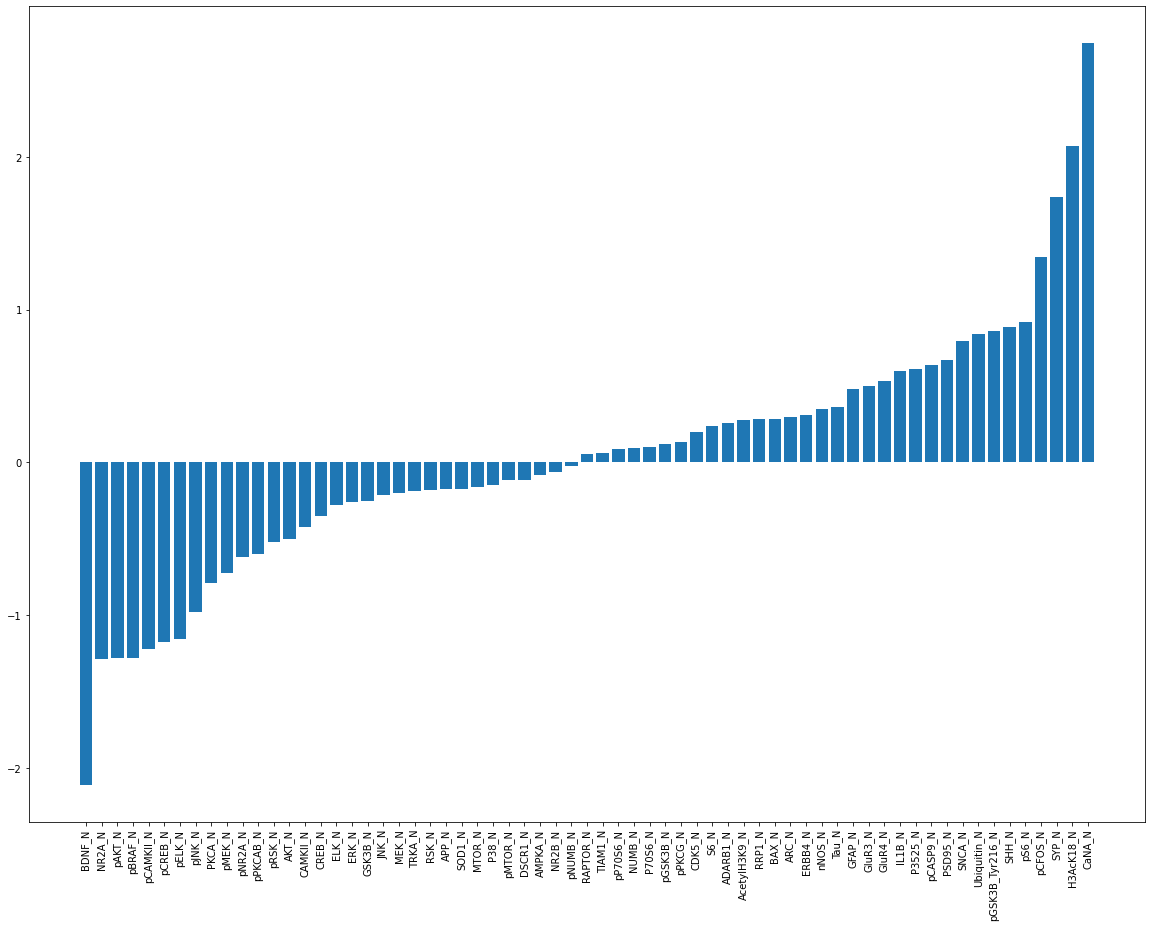


 Top to features Important for Binary Classifications are: 
 [['PSD95_N'], ['SNCA_N'], ['Ubiquitin_N'], ['pGSK3B_Tyr216_N'], ['SHH_N'], ['pS6_N'], ['pCFOS_N'], ['SYP_N'], ['H3AcK18_N'], ['CaNA_N']]


In [224]:
# Getting Important Features list and score by using,
log_reg_important_features_B = train_log_reg_B.coef_[0]

# Passed values to function for visualing the important features
important_feature_visualisation(log_reg_important_features_B, x_train)

# Finding top -10 important features for classification
log_reg_important_features_B_top = list_top_10_imp_features(log_reg_important_features_B,x_train)
print("\n Top to features Important for Binary Classifications are: \n",log_reg_important_features_B_top )

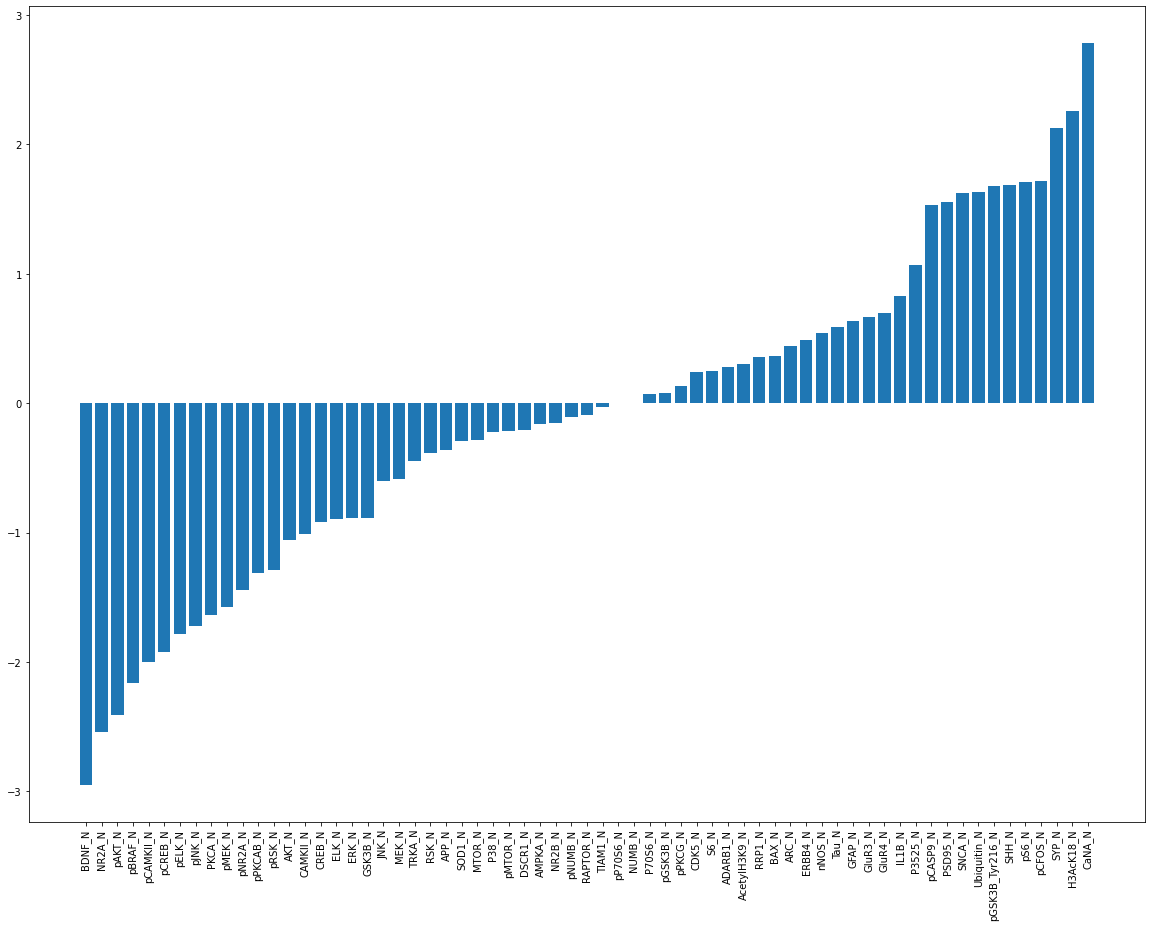


 Top to features Important for Multiclass Classifications are: 
 [['PSD95_N'], ['SNCA_N'], ['Ubiquitin_N'], ['pGSK3B_Tyr216_N'], ['SHH_N'], ['pS6_N'], ['pCFOS_N'], ['SYP_N'], ['H3AcK18_N'], ['CaNA_N']]


In [225]:
# Getting Important Features list and score by using,
log_reg_important_features_M = train_log_reg_M.coef_[0]

# Passed values to function for visualing the important features
important_feature_visualisation(log_reg_important_features_M, x_train_m)

# Finding top -10 important features for classification
log_reg_important_features_M_top = list_top_10_imp_features(log_reg_important_features_M,x_train_m)
print("\n Top to features Important for Multiclass Classifications are: \n",log_reg_important_features_M_top )

## SVM Classification Important Features

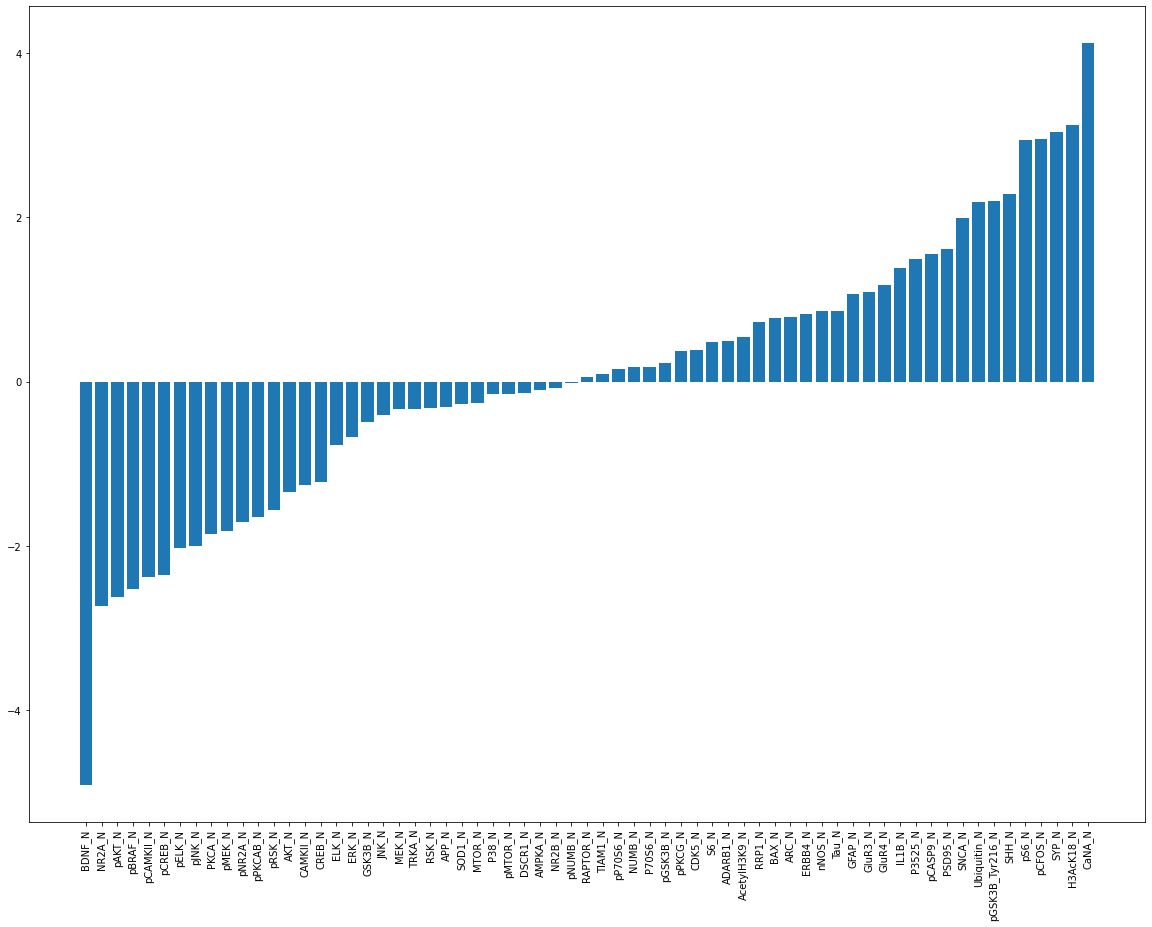


 Top to features Important for Binary Classifications are: 
 [['PSD95_N'], ['SNCA_N'], ['Ubiquitin_N'], ['pGSK3B_Tyr216_N'], ['SHH_N'], ['pS6_N'], ['pCFOS_N'], ['SYP_N'], ['H3AcK18_N'], ['CaNA_N']]


In [223]:
# taken kernel as linear to have important features as coef_
train_SVC_Bf = SVC(C =10, gamma = 0.005, kernel = 'linear')
train_SVC_Bf.fit(x_train,y_train)

# Getting Important Features list and score by using,
SVC_important_features_B = train_SVC_Bf.coef_[0]

# Passed values to function for visualing the important features
important_feature_visualisation(SVC_important_features_B, x_train)

# Finding top -10 important features for classification
SVC_important_features_B_top = list_top_10_imp_features(SVC_important_features_B,x_train)
print("\n Top to features Important for Binary Classifications are: \n",SVC_important_features_B_top )

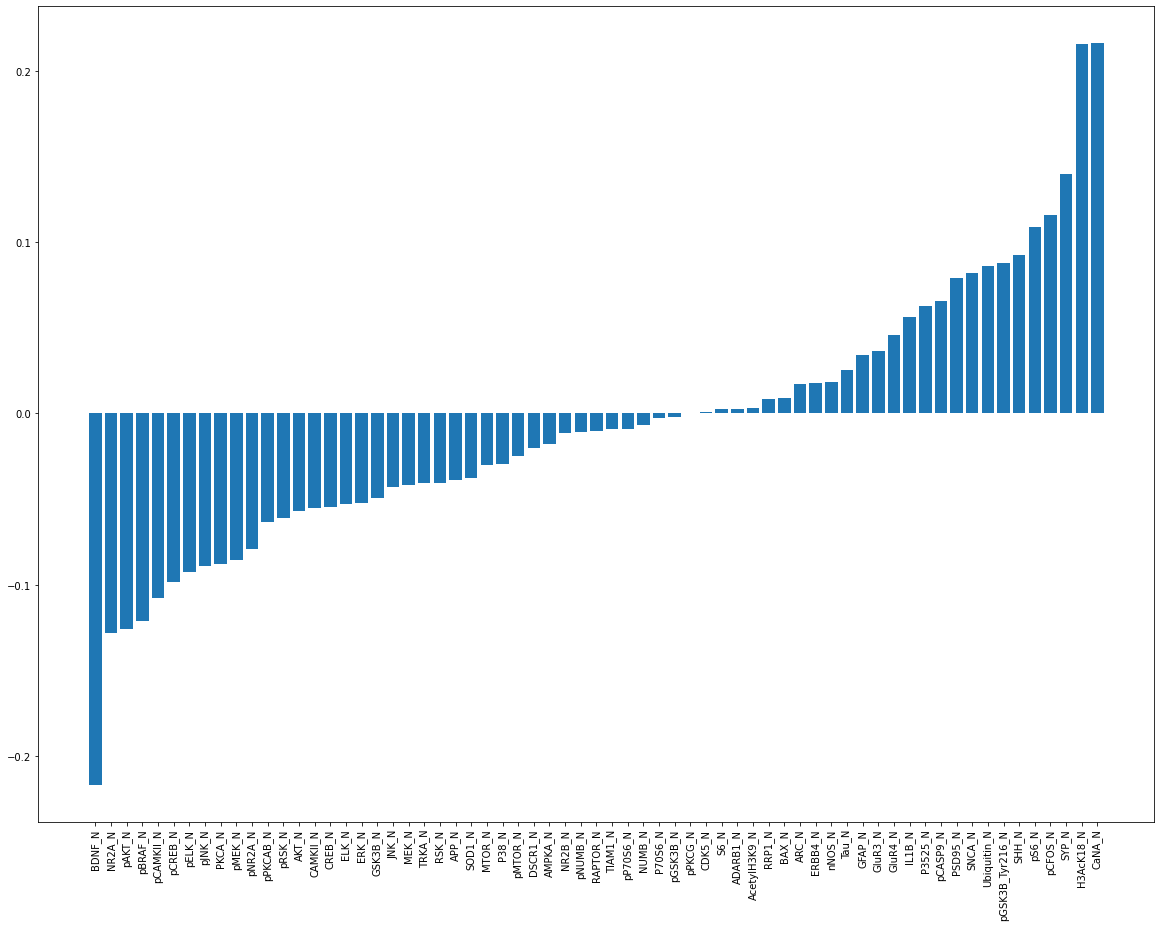


 Top to features Important for ulticlass Classifications are: 
 [['PSD95_N'], ['SNCA_N'], ['Ubiquitin_N'], ['pGSK3B_Tyr216_N'], ['SHH_N'], ['pS6_N'], ['pCFOS_N'], ['SYP_N'], ['H3AcK18_N'], ['CaNA_N']]


In [226]:
# taken kernel as linear to have important features as coef_
train_SVC_Mf = SVC(C =100, gamma = 0.01, kernel = 'linear')
train_SVC_Mf.fit(x_train_m,y_train_m)

# Getting Important Features list and score by using,
SVC_important_features_M = train_SVC_Mf.coef_[0]

# Passed values to function for visualing the important features
important_feature_visualisation(SVC_important_features_M, x_train_m)

# Finding top -10 important features for classification
SVC_important_features_M_top = list_top_10_imp_features(SVC_important_features_M,x_train_m)
print("\n Top to features Important for Multiclass Classifications are: \n",SVC_important_features_M_top )

## Random Forest Feature Importance

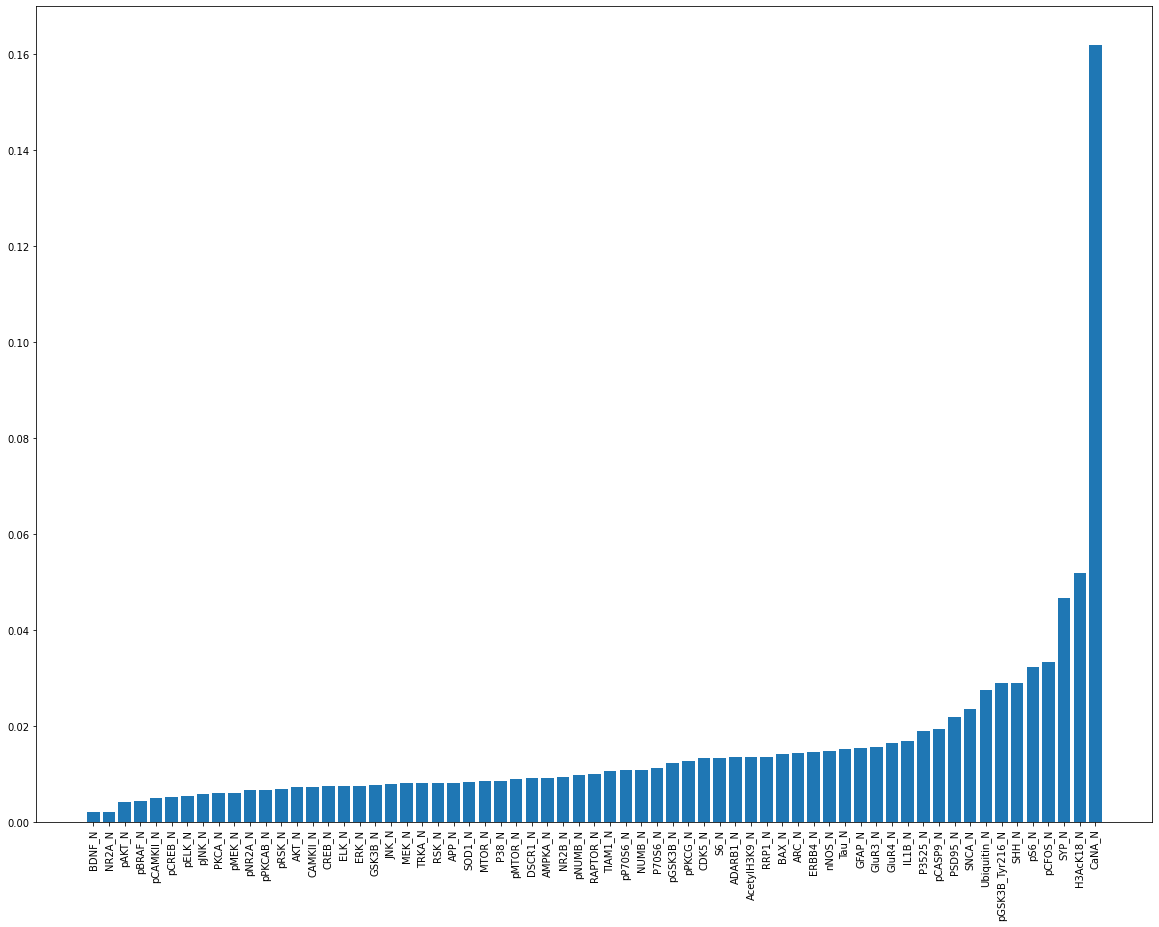


 Top 10 features Important for Binary class Classifications are: 
 [['PSD95_N'], ['SNCA_N'], ['Ubiquitin_N'], ['pGSK3B_Tyr216_N'], ['SHH_N'], ['pS6_N'], ['pCFOS_N'], ['SYP_N'], ['H3AcK18_N'], ['CaNA_N']]


In [230]:
# Getting Important Features list and score by using,
RF_important_features_B = train_RF_B.feature_importances_

# Passed values to function for visualing the important features
important_feature_visualisation(RF_important_features_B, x_train)

# Finding top -10 important features for classification
RF_important_features_B_top = list_top_10_imp_features(SVC_important_features_B,x_train)
print("\n Top 10 features Important for Binary class Classifications are: \n",RF_important_features_B_top )

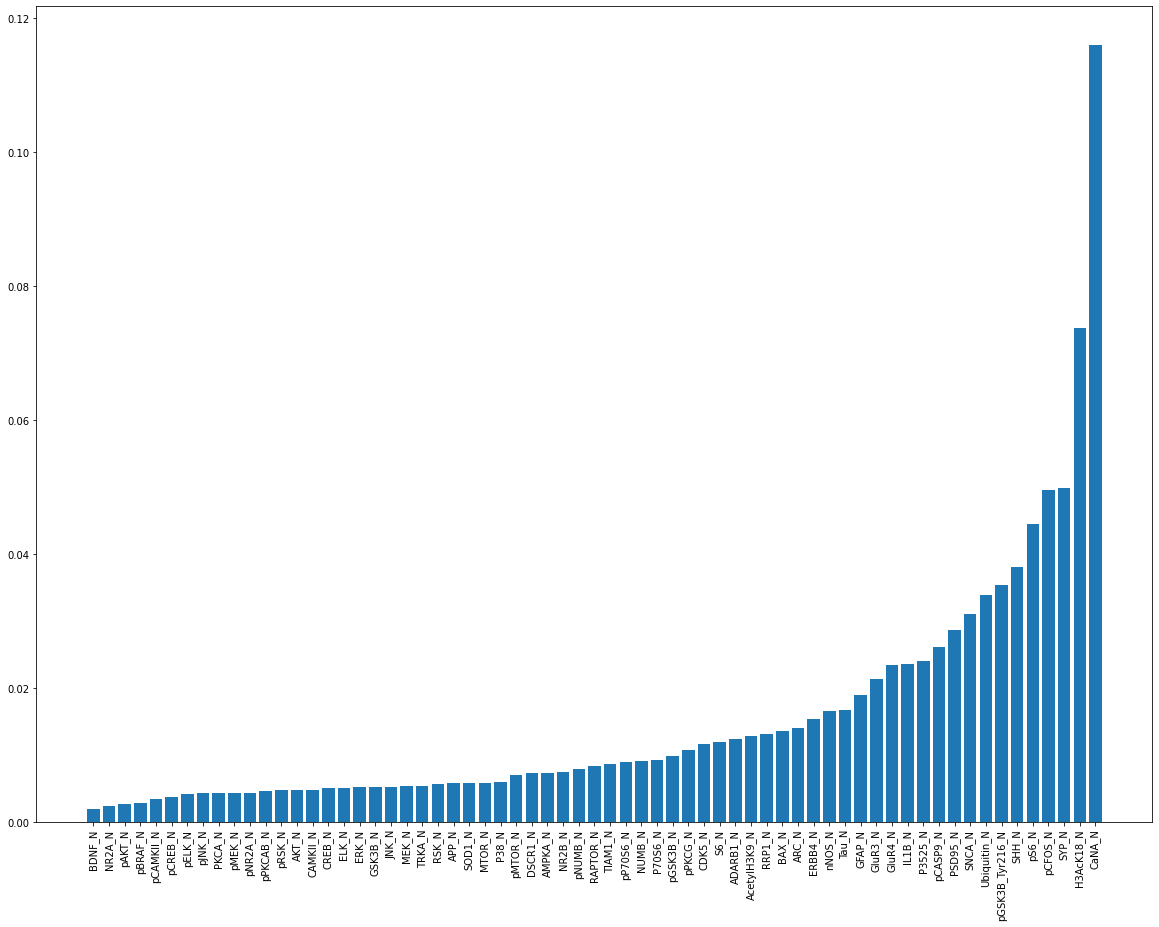


 Top 10 features Important for multiclass Classifications are: 
 [['PSD95_N'], ['SNCA_N'], ['Ubiquitin_N'], ['pGSK3B_Tyr216_N'], ['SHH_N'], ['pS6_N'], ['pCFOS_N'], ['SYP_N'], ['H3AcK18_N'], ['CaNA_N']]


In [231]:
# Getting Important Features list and score by using,
RF_important_features_M = train_RF_M.feature_importances_

# Passed values to function for visualing the important features
important_feature_visualisation(RF_important_features_M, x_train_m)

# Finding top -10 important features for classification
RF_important_features_M_top = list_top_10_imp_features(SVC_important_features_M,x_train_m)
print("\n Top 10 features Important for multiclass Classifications are: \n",RF_important_features_M_top )

## Neural Network Feature Importance

In [245]:
# Visualising Feature Importance of dataset for Binary Classification 
import shap
explainer = shap.KernelExplainer(train_NN_B_K.predict,x_train)
shap_values = explainer.shap_values(x_val,nsamples=len(x_train.columns))

# running time 11m 11s

Using 571 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/191 [00:00<?, ?it/s]

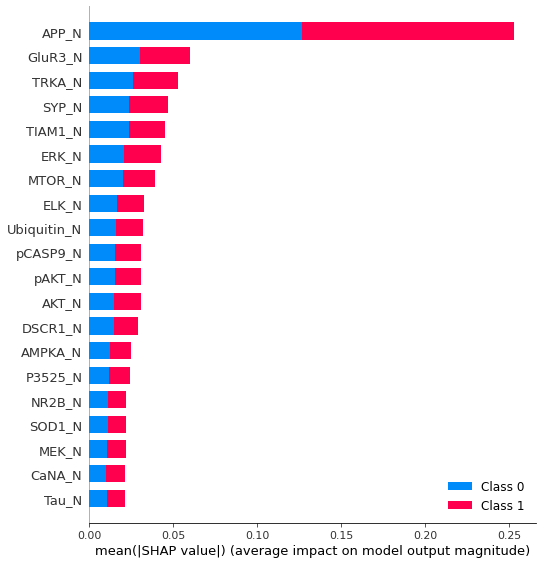

In [246]:
# Visualing highest importance fetures data
shap.summary_plot(shap_values,x_val,feature_names=x_train.columns.tolist())

In [253]:
# Visualising Feature Importance of dataset for Binary Classification 
import shap
explainer_m = shap.KernelExplainer(train_NN_M_K.predict,x_train_m)
shap_values_m = explainer_m.shap_values(x_val_m,nsamples=len(x_train_m.columns))
# runtime  6m 4s

Using 571 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/191 [00:00<?, ?it/s]

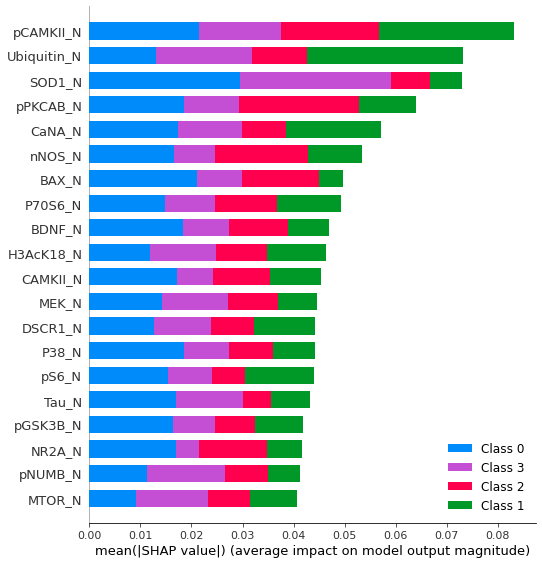

In [255]:
# Visualing highest importance fetures data
shap.summary_plot(shap_values_m,x_val_m,feature_names=x_train_m.columns.tolist())

# Recursive Feature Elimination

##  Funtion for Finding Features to Eliminate

In [288]:
# Function for finding best features and optimal number of features required for model
def recursive_feature_elimination(model,X_train,Y_train):

  # running RFECV algorithm with 5 Folds and fitting the model on training data
  rfecv = RFECV(estimator=model,step=1, cv=StratifiedKFold(5), scoring="accuracy", min_features_to_select=1)
  rfecv.fit(X_train,Y_train)
  opt_features = rfecv.n_features_
  Best_features = X_train.columns[rfecv.support_]
  Cols_to_drop_rfe = rfecv.ranking_
  to_eliminitae_columns =[]

  #checking if rank is more than 1 means feature can be eliminated
  for index,value in enumerate(Cols_to_drop_rfe):
    if value != 1:
      to_eliminitae_columns.append(index)

  # assingning which features to eliminate to varible
  features_to_eliminate = X_train.columns[to_eliminitae_columns]
  return opt_features,Best_features,features_to_eliminate

## Elastic Net Logistic Regression

In [272]:
# checking recursive feature elimitation function for binary classification to find out which features can be elimated and no of optimal features

opt_features_lr_B,Best_features_lr_B,features_to_eliminate_lr_B = recursive_feature_elimination(train_log_reg_B,x_train,y_train)
print ("Optimal Features for this model are: \n",opt_features_lr_B )
print ("\nBest Features for this model are: \n",Best_features_lr_B)
print ("\nFeatures Which can be eliminated for this model are: \n",features_to_eliminate_lr_B)

#runtime 2m

Optimal Features for this model are: 
 36

Best Features for this model are: 
 Index(['pAKT_N', 'pCAMKII_N', 'pELK_N', 'PKCA_N', 'pRSK_N', 'CAMKII_N',
       'ELK_N', 'ERK_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N',
       'MTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'CDK5_N', 'AcetylH3K9_N',
       'ERBB4_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SYP_N', 'CaNA_N'],
      dtype='object')

Features Which can be eliminated for this model are: 
 Index(['BDNF_N', 'NR2A_N', 'pBRAF_N', 'pCREB_N', 'pJNK_N', 'pMEK_N', 'pNR2A_N',
       'pPKCAB_N', 'AKT_N', 'CREB_N', 'GSK3B_N', 'SOD1_N', 'P38_N', 'pMTOR_N',
       'pGSK3B_N', 'pPKCG_N', 'S6_N', 'ADARB1_N', 'RRP1_N', 'BAX_N', 'ARC_N',
       'nNOS_N', 'Tau_N', 'GFAP_N', 'PSD95_N', 'SHH_N', 'pS6_N', 'pCFOS_N',
       'H3AcK18_N'],
      dtype='object')


In [273]:
# checking recursive feature elimitation function for multiclass classification to find out which features can be elimated and no of optimal features
opt_features_lr_M,Best_features_lr_M,features_to_eliminate_lr_M = recursive_feature_elimination(train_log_reg_M,x_train_m,y_train_m)
print ("Optimal Features for this model are: \n",opt_features_lr_M)
print ("\nBest Features for this model are: \n",Best_features_lr_M)
print ("\nFeatures Which can be eliminated for this model are: \n",features_to_eliminate_lr_M)

#runtime 8m 58s

Optimal Features for this model are: 
 53

Best Features for this model are: 
 Index(['BDNF_N', 'NR2A_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N',
       'pJNK_N', 'PKCA_N', 'pNR2A_N', 'pPKCAB_N', 'AKT_N', 'CAMKII_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N',
       'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N',
       'CDK5_N', 'S6_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N',
       'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'pS6_N', 'SYP_N',
       'H3AcK18_N', 'CaNA_N'],
      dtype='object')

Features Which can be eliminated for this model are: 
 Index(['pAKT_N', 'pMEK_N', 'pRSK_N', 'CREB_N', 'ELK_N', 'AMPKA_N', 'NR2B_N',
       'ADARB1_N', 'GluR3_N', 'PSD95_N', 'SHH_N', 'pCFOS_N'],
      dtype='object')


## SVM Classification

In [280]:
# checking recursive feature elimitation function for binary classification to find out which features can be elimated and no of optimal features

opt_features_svm_B,Best_features_svm_B,features_to_eliminate_svm_B = recursive_feature_elimination(train_SVC_Bf,x_train,y_train)
print ("Optimal Features for this model are: \n",opt_features_svm_B )
print ("\nBest Features for this model are: \n",Best_features_svm_B)
print ("\nFeatures Which can be eliminated for this model are: \n",features_to_eliminate_svm_B)

#runtime 17s

Optimal Features for this model are: 
 25

Best Features for this model are: 
 Index(['pAKT_N', 'pCAMKII_N', 'pJNK_N', 'PKCA_N', 'pRSK_N', 'CAMKII_N',
       'ELK_N', 'ERK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N',
       'DSCR1_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'P70S6_N', 'CDK5_N',
       'S6_N', 'Tau_N', 'GluR3_N', 'SNCA_N', 'SYP_N', 'CaNA_N'],
      dtype='object')

Features Which can be eliminated for this model are: 
 Index(['BDNF_N', 'NR2A_N', 'pBRAF_N', 'pCREB_N', 'pELK_N', 'pMEK_N', 'pNR2A_N',
       'pPKCAB_N', 'AKT_N', 'CREB_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'P38_N',
       'pMTOR_N', 'AMPKA_N', 'NR2B_N', 'pP70S6_N', 'NUMB_N', 'pGSK3B_N',
       'pPKCG_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N',
       'ERBB4_N', 'nNOS_N', 'GFAP_N', 'GluR4_N', 'IL1B_N', 'P3525_N',
       'pCASP9_N', 'PSD95_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N',
       'pS6_N', 'pCFOS_N', 'H3AcK18_N'],
      dtype='object')


In [281]:
# checking recursive feature elimitation function for multiclass classification to find out which features can be elimated and no of optimal features

opt_features_svm_M,Best_features_svm_M,features_to_eliminate_svm_M = recursive_feature_elimination(train_SVC_Mf,x_train_m,y_train_m)
print ("Optimal Features for this model are: \n",opt_features_svm_M)
print ("\nBest Features for this model are: \n",Best_features_svm_M)
print ("\nFeatures Which can be eliminated for this model are: \n",features_to_eliminate_svm_M)

#rutime 9s

Optimal Features for this model are: 
 44

Best Features for this model are: 
 Index(['BDNF_N', 'NR2A_N', 'pBRAF_N', 'pCAMKII_N', 'pJNK_N', 'pNR2A_N',
       'pPKCAB_N', 'AKT_N', 'CAMKII_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N',
       'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'DSCR1_N',
       'AMPKA_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'NUMB_N', 'P70S6_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'RRP1_N', 'BAX_N', 'nNOS_N', 'Tau_N',
       'GFAP_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'H3AcK18_N', 'CaNA_N'],
      dtype='object')

Features Which can be eliminated for this model are: 
 Index(['pAKT_N', 'pCREB_N', 'pELK_N', 'PKCA_N', 'pMEK_N', 'pRSK_N', 'CREB_N',
       'ELK_N', 'pMTOR_N', 'NR2B_N', 'pP70S6_N', 'pGSK3B_N', 'ADARB1_N',
       'AcetylH3K9_N', 'ARC_N', 'ERBB4_N', 'GluR3_N', 'PSD95_N', 'pS6_N',
       'pCFOS_N', 'SYP_N'],
      dtype='object')


## Random Forest Classification

In [279]:
# checking recursive feature elimitation function for binary classification to find out which features can be elimated and no of optimal features

opt_features_rf_B,Best_features_rf_B,features_to_eliminate_rf_B = recursive_feature_elimination(train_RF_B,x_train,y_train)
print ("Optimal Features for this model are: \n",opt_features_rf_B )
print ("\nBest Features for this model are: \n",Best_features_rf_B)
print ("\nFeatures Which can be eliminated for this model are: \n",features_to_eliminate_rf_B)

#runtime 1m 41s

Optimal Features for this model are: 
 54

Best Features for this model are: 
 Index(['BDNF_N', 'NR2A_N', 'pAKT_N', 'pCREB_N', 'pELK_N', 'PKCA_N', 'pNR2A_N',
       'pPKCAB_N', 'pRSK_N', 'AKT_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'pGSK3B_N', 'pPKCG_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'ARC_N', 'ERBB4_N', 'nNOS_N',
       'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N',
       'pCASP9_N', 'PSD95_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'CaNA_N'],
      dtype='object')

Features Which can be eliminated for this model are: 
 Index(['pBRAF_N', 'pCAMKII_N', 'pJNK_N', 'pMEK_N', 'MEK_N', 'NUMB_N',
       'P70S6_N', 'CDK5_N', 'BAX_N', 'SNCA_N', 'SHH_N'],
      dtype='object')


In [274]:
# checking recursive feature elimitation function for multiclass classification to find out which features can be elimated and no of optimal features

opt_features_rf_M,Best_features_rf_M,features_to_eliminate_rf_M = recursive_feature_elimination(train_RF_M,x_train_m,y_train_m)
print ("Optimal Features for this model are: \n",opt_features_rf_M)
print ("\nBest Features for this model are: \n",Best_features_rf_M)
print ("\nFeatures Which can be eliminated for this model are: \n",features_to_eliminate_rf_M)

# runtime 2m 31s

Optimal Features for this model are: 
 62

Best Features for this model are: 
 Index(['pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N',
       'TRKA_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N',
       'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N',
       'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N',
       'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N',
       'SHH_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'CaNA_N'],
      dtype='object')

Features Which can be eliminated for this model are: 
 Index(['BDNF_N', 'NR2A_N', 'RSK_N'], dtype='object')


## Neural Network Classification

In [275]:
## Due to complexity of nueral network model and unavailabilty of feature_importances values we could not find which feature are best and which can be eliminated
# But We tried showing the best features values using feature importance in earlier section

# Testing Trained ML Models on Test Dataset

## Performing EDA on Test Data

In [341]:
test_data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")
test_data.shape
# Data contains 225 observations (Rows) and 79 features (Columns) having Protein Data tested on Mouses 
test_data.info()
# All features except Genotype and Treatment behavior are float64
# 5 features out of 79 are having null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            225 non-null    float64
 1   ITSN1_N             225 non-null    float64
 2   BDNF_N              225 non-null    float64
 3   NR1_N               225 non-null    float64
 4   NR2A_N              225 non-null    float64
 5   pAKT_N              225 non-null    float64
 6   pBRAF_N             225 non-null    float64
 7   pCAMKII_N           225 non-null    float64
 8   pCREB_N             225 non-null    float64
 9   pELK_N              225 non-null    float64
 10  pERK_N              225 non-null    float64
 11  pJNK_N              225 non-null    float64
 12  PKCA_N              225 non-null    float64
 13  pMEK_N              225 non-null    float64
 14  pNR1_N              225 non-null    float64
 15  pNR2A_N             225 non-null    float64
 16  pNR2B_N 

In [305]:
# Label Encoding of dataset
encode_val(test_data)

#Checking mising values
test_data_new, dropped_miss_cols_test = check_missing_drop(test_data)

test_data.shape, test_data_new.shape
# New shape changed to 78 from initial 79 features

#imputed the missing values
test_data_imputed = impute_missing(test_data_new)

# removing outliers in dataset
remove_outliers(test_data_imputed)

# removing highly correlated data
test_data_cleaned,test_drop_corr_cols = remove_highly_corelated(test_data_imputed)

test_data_cleaned.shape
# New shape changed to 60 from initial 79 features

# columns  which dropped from orginal datasets are 
dropped_test_cols = dropped_miss_cols_test + list(test_drop_corr_cols)
print("Feautures which dropped from orginal datasets are : \n", dropped_test_cols)

Feautures which dropped from orginal datasets are : 
 ['H3MeK4_N', 'pJNK_N', 'MTOR_N', 'TRKA_N', 'pAKT_N', 'BCL2_N', 'NR2A_N', 'BRAF_N', 'pERK_N', 'pMEK_N', 'NR1_N', 'DYRK1A_N', 'pNR2B_N', 'pNR1_N', 'ITSN1_N', 'pMEK_N', 'NR2B_N', 'NR1_N', 'pBRAF_N', 'EGR1_N', 'ERK_N', 'pERK_N', 'ITSN1_N', 'pAKT_N', 'pNR2B_N', 'BRAF_N', 'NR2A_N', 'DYRK1A_N']


In [307]:
# Checking Class Balance
# get alues of distinct classes count
pd.value_counts(test_data_cleaned.Genotype)
pd.value_counts(test_data_cleaned.Treatment_Behavior)

# Classes are not balanced for binary classes but for multiclass three classes have same count

0.0    60
1.0    60
2.0    60
3.0    45
Name: Treatment_Behavior, dtype: int64

## Split into features and classes - Test Data

In [308]:
X_test, Y_test_B, Y_test_M = splitXY(training_data_cleaned)

## Performing Model Testing and Predicting Based on Each Model

## Elastic Net Logistic Regression

In [336]:
# Finding predictions for understanding differnt accuracy metrics
predictions_log_reg_B_test = train_log_reg_B.predict(X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_B, predictions_log_reg_B_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_B, predictions_log_reg_B_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.4566929133858268 
2)Balanced_accuracy_score :- 0.4531477380575767  
3)F1_score :- 0.4566929133858268

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.53      0.48      0.50       435
         1.0       0.38      0.43      0.40       327

    accuracy                           0.46       762
   macro avg       0.45      0.45      0.45       762
weighted avg       0.46      0.46      0.46       762



In [325]:
# Finding predictions for understanding differnt accuracy metrics
predictions_log_reg_M_test = train_log_reg_M.predict(X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_M, predictions_log_reg_M_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_M, predictions_log_reg_M_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.6233595800524935 
2)Balanced_accuracy_score :- 0.6195454545454546  
3)F1_score :- 0.6233595800524935

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.38      0.45      0.42       225
         1.0       0.96      0.80      0.87       225
         2.0       0.55      0.66      0.60       180
         3.0       0.79      0.57      0.66       132

    accuracy                           0.62       762
   macro avg       0.67      0.62      0.64       762
weighted avg       0.66      0.62      0.64       762



## SVM Classification

In [326]:
# Finding predictions for understanding differnt accuracy metrics
predictions_SVM_B_test = train_SVC_Bf.predict(X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_B, predictions_SVM_B_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_B, predictions_SVM_B_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.9855643044619422 
2)Balanced_accuracy_score :- 0.9858378150374354  
3)F1_score :- 0.9855643044619422

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       435
         1.0       0.98      0.99      0.98       327

    accuracy                           0.99       762
   macro avg       0.98      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



In [327]:
# Finding predictions for understanding differnt accuracy metrics
predictions_SVM_M_test = train_SVC_Mf.predict(X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_M, predictions_SVM_M_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_M, predictions_SVM_M_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.9986876640419947 
2)Balanced_accuracy_score :- 0.9986111111111111  
3)F1_score :- 0.9986876640419947

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       225
         1.0       1.00      1.00      1.00       225
         2.0       1.00      0.99      1.00       180
         3.0       1.00      1.00      1.00       132

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



## Random Forest Classification

In [328]:
# Finding predictions for understanding differnt accuracy metrics
predictions_RF_B_test = train_RF_B.predict(X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_B, predictions_RF_B_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_B, predictions_RF_B_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.9868766404199475 
2)Balanced_accuracy_score :- 0.9850891068227354  
3)F1_score :- 0.9868766404199475

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       435
         1.0       1.00      0.97      0.98       327

    accuracy                           0.99       762
   macro avg       0.99      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



In [329]:
# Finding predictions for understanding differnt accuracy metrics
predictions_RF_M_test = train_RF_M.predict(X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_M, predictions_RF_M_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_M, predictions_RF_M_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.994750656167979 
2)Balanced_accuracy_score :- 0.9947727272727274  
3)F1_score :- 0.994750656167979

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       225
         1.0       1.00      1.00      1.00       225
         2.0       0.99      1.00      0.99       180
         3.0       0.99      0.99      0.99       132

    accuracy                           0.99       762
   macro avg       0.99      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



## NN Classification Model

In [330]:
# doing one hot_encoding for neural network classification
Y_test_me = to_categorical(Y_test_M) # multiclass target training
Y_test_e = to_categorical(Y_test_B) # binaryclass target training

In [332]:
Y_test_e

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [334]:
# Finding predictions for understanding differnt accuracy metrics
predictions_NN_B_test = nn_predict(train_NN_B_K,X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_B, predictions_NN_B_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_B, predictions_NN_B_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 1.0 
2)Balanced_accuracy_score :- 1.0  
3)F1_score :- 1.0

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       435
         1.0       1.00      1.00      1.00       327

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



In [335]:
# Finding predictions for understanding differnt accuracy metrics
predictions_NN_M_test = nn_predict(train_NN_M_K,X_test)

#Running Accuracy Tests
accuracy_tests(Y_test_M, predictions_NN_M_test)

# Printing Classification Report
print("\nClassification Report: \n",classification_report(Y_test_M, predictions_NN_M_test))


The accuracy metrics for given values are: 
1)Accuracy_score :- 0.9986876640419947 
2)Balanced_accuracy_score :- 0.9988888888888889  
3)F1_score :- 0.9986876640419947

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       225
         1.0       1.00      1.00      1.00       225
         2.0       0.99      1.00      1.00       180
         3.0       1.00      1.00      1.00       132

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



# **Observations and Infernces - Overall**

*   All the model provides good accuracy to training, validation as well as for test datasets
* We failed to create pipeline for all the models due to limited time availabilty
*   The accuracy scores for Elastic net Logistic regression on Test Dataset found to be low as compared to other models
*   Hyperparamters are tuned and fitted with models improved the acurracy
* The recursive feature elimination helped to reduce feature dimension drastically
*   We tried eliminating the features obtained by recursive feature eliminations and still found good accuracy on test,val and trained datasets
* We could have improved further observations if we could be able to get more time and huge dataset to work upon
* The logical range for each hyperparameter for each of the model is taken through extensive web research which is mentioned in refernces
* Nueral Networks results seem quite impressive compared to other models but this mght be because of overfitting




# Refernces 

1. https://www.analyticsvidhya.com/blog/2021/05detecting-and-treating-outliers-treating-the-odd-one-out/
2. https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
3. https://realpython.com/logistic-regression-python/
4. https://vitalflux.com/k-fold-cross-validation-python-example/
5. https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/#:~:text=It%20can%20be%20used%20to,necessary%20steps%20within%20this%20pipeline.
6. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
7. https://realpython.com/logistic-regression-python/
8. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
8. https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
9. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
10. https://www.kaggle.com/code/mtax687/single-layer-neural-network-using-numpy/notebook
11. https://programmathically.com/weight-decay-in-neural-networks/
12. https://towardsdatascience.com/the-complete-guide-to-neural-networks-multinomial-classification-4fe88bde7839
13. https://www.analyticsvidhya.com/blog/2021/04/introduction-to-softmax-for-neural-network/
14. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
15. https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
16. https://keras.io/api/models/model_training_apis/
17. https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
18. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
19. https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/
20. https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/
21. https://faroit.com/keras-docs/1.0.0/models/sequential/
22. https://analyticsindiamag.com/a-guide-to-explaining-feature-importance-in-neural-networks-using-shap/




